# analysis of CCQE topology events from myVertex

In [2]:
import sys; sys.path.insert(0, '../../AnaTreesPackage/notebooks')
from notebooks_tools import * 
from matplotlib import ticker
%matplotlib inline

# Truth CC1p pairs

In [158]:
GENIECC1p = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_GENIECC1p_MCC7_MC_BNB.csv',
                     converters={'track_id':generic,'distances':generic,'delta_phi':generic})
print len(GENIECC1p),'genie cc1p vertices'
recoGENIECC1p = GENIECC1p[GENIECC1p.IsVertexReconstructed==True]
print len(recoGENIECC1p),'fully reconstructed'

121541 genie cc1p vertices
8098 fully reconstructed


In [249]:
MCevents = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC7_MC_BNB.csv',
                     converters={'track_id':generic,'distances':generic,'delta_phi':generic})

print len(MCevents),'2-tracks clusters from MC-BNB events'
MCeventsTrueCC1p = MCevents[MCevents.GENIECC1p==1]
MCeventsNonTrueCC1p = MCevents[MCevents.GENIECC1p!=1]
print len(MCeventsTrueCC1p), 'are true (GENIE) cc1p'

60441 2-tracks clusters from MC-BNB events
5413 are true (GENIE) cc1p


In [176]:
extBNB2tracks = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC7_extBNB.csv',
                     converters={'track_id':generic,'distances':generic,'delta_phi':generic})

print len(extBNB2tracks),'extBNB 2-tracks clusters'

13453 extBNB 2-tracks clusters


# first question: how to assign the muon and proton tracks in the truth level?
when we cluster MC tracks and ask if they are CC1p, we assing the reconstructed muon and proton tracks. What is the best way to do it? using the length of the tracks (long vs. short) or using the PIDA of the tracks (small vs. large PIDA?

In [159]:
efficiency = 100*float(len(recoGENIECC1p[recoGENIECC1p['pdg_long']==13]))/len(recoGENIECC1p)
eff_err = efficiency*np.sqrt(1./len(recoGENIECC1p[recoGENIECC1p['pdg_long']==13])+1./len(recoGENIECC1p))
print 'classification efficiency by length: %.1f'%efficiency+' +/- %.1f'%eff_err+' %'

efficiency = 100*float(len(recoGENIECC1p[recoGENIECC1p['pdg_small_pida']==13]))/len(recoGENIECC1p)
eff_err = efficiency*np.sqrt(1./len(recoGENIECC1p[recoGENIECC1p['pdg_small_pida']==13])+1./len(recoGENIECC1p))
print 'classification efficiency by PIDA: %.1f'%efficiency+' +/- %.1f'%eff_err+' %'

classification efficiency by length: 87.2 +/- 1.4 %
classification efficiency by PIDA: 90.4 +/- 1.5 %


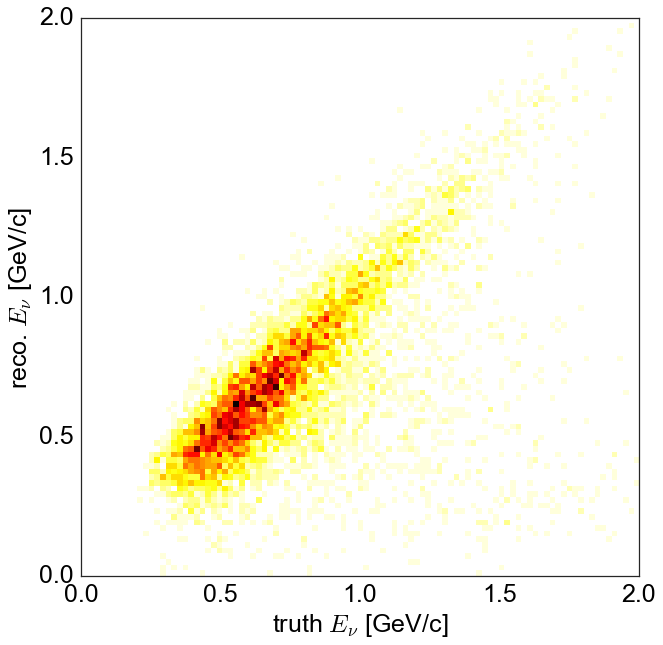

In [247]:
# fig= plt.figure(figsize=(20,20))
# ax=fig.add_subplot(2,2,1)
# plot_2d_hist(recoGENIECC1p.truth_Pmu , recoGENIECC1p.reco_CC1p_Pmu , bins=np.linspace(0,1.3,60) , xlabel='truth $p_{\\mu}$', ylabel='reco. $p_{\\mu}$',ax=ax);
# ax=fig.add_subplot(2,2,2)
# plot_2d_hist(recoGENIECC1p.truth_Pmu_x , recoGENIECC1p.reco_CC1p_Pmu_x , bins=np.linspace(-0.6,0.6,60), xlabel='truth $p_{\\mu}$-x', ylabel='reco. $p_{\\mu}$-x',ax=ax);
# ax=fig.add_subplot(2,2,3)
# plot_2d_hist(recoGENIECC1p.truth_Pmu_y , recoGENIECC1p.reco_CC1p_Pmu_y, bins=np.linspace(-0.6,0.6,60) , xlabel='truth $p_{\\mu}$-y', ylabel='reco. $p_{\\mu}$-y',ax=ax);
# ax=fig.add_subplot(2,2,4)
# plot_2d_hist(recoGENIECC1p.truth_Pmu_z , recoGENIECC1p.reco_CC1p_Pmu_z, bins=np.linspace(-0.3,1.2,60), xlabel='truth $p_{\\mu}$-z', ylabel='reco. $p_{\\mu}$-z',ax=ax);
# plt.tight_layout()

# fig= plt.figure(figsize=(20,20))
# ax=fig.add_subplot(2,2,1)
# plot_2d_hist(recoGENIECC1p.truth_Pp , recoGENIECC1p.reco_CC1p_Pp , bins=np.linspace(0,1.3,60) , xlabel='truth $p_{p}$', ylabel='reco. $p_{p}$',ax=ax,norm='non');
# ax=fig.add_subplot(2,2,2)
# plot_2d_hist(recoGENIECC1p.truth_Pp_x , recoGENIECC1p.reco_CC1p_Pp_x , bins=np.linspace(-0.8,0.8,60), xlabel='truth $p_{p}$-x', ylabel='reco. $p_{p}$-x',ax=ax,norm='non');
# ax=fig.add_subplot(2,2,3)
# plot_2d_hist(recoGENIECC1p.truth_Pp_y , recoGENIECC1p.reco_CC1p_Pp_y, bins=np.linspace(-0.8,0.8,60) , xlabel='truth $p_{p}$-y', ylabel='reco. $p_{p}$-y',ax=ax,norm='non');
# ax=fig.add_subplot(2,2,4)
# plot_2d_hist(recoGENIECC1p.truth_Pp_z , recoGENIECC1p.reco_CC1p_Pp_z, bins=np.linspace(-0.3,1.2,60), xlabel='truth $p_{p}$-z', ylabel='reco. $p_{p}$-z',ax=ax,norm='non' );
# plt.tight_layout()


# plot_2d_hist(recoGENIECC1p.truth_theta_pq , 180-recoGENIECC1p.reco_CC1p_theta_pq , xlabel='truth $\\theta_{p,q}$ [deg.]', ylabel='$\\pi-$ reco. $\\theta_{p,q}$ [deg.]');
plot_2d_hist(recoGENIECC1p.truth_Ev , recoGENIECC1p.reco_CC1p_Ev , bins=np.linspace(0,2,100), xlabel='truth $E_{\\nu}$ [GeV/c]', ylabel='reco. $E_{\\nu}$ [GeV/c]');




# second question: how can we enhance contribtion from true CC1p pairs while suppresing non-CC1p reconstructed pairs as well as cosmic background ?
We should look at all possible features of 2-tracks clusters and try to find 'money' cuts that kill background. Then, we can later on take care of maximizing efficiency and purity 

In [243]:
def plot_feature_2tracks_clusters(var='l_long',
                                  x_label='$l_{long}$ [cm]',mul=1,
                                  bins=np.linspace(0,300,100),
                                  fig=None,do_add_legend=False,
                                  Nh=2,Nw=2,i=1):
    ax = fig.add_subplot(Nh,Nw,i)
    bins=bins
#     plt.hist(mul*recoGENIECC1p[var],normed=1,label='GENIE true (reconstructed) CC1p',bins=bins,histtype='step',linewidth=3)
    plt.hist(mul*MCeventsNonTrueCC1p[var],normed=1,label='MC-BNB non true CC1p',bins=bins,histtype='step',linewidth=3)
    plt.hist(mul*MCeventsTrueCC1p[var],normed=1,label='MC-BNB true(GENIE) CC1p',bins=bins,histtype='step',linewidth=3)
    plt.hist(mul*extBNB2tracks[var],normed=1,label='ext-BNB 2-tracks clusters',bins=bins,histtype='step',linewidth=3)
    if do_add_legend:
        ax.legend(fontsize=15)
    set_axes(ax,x_label=x_label)



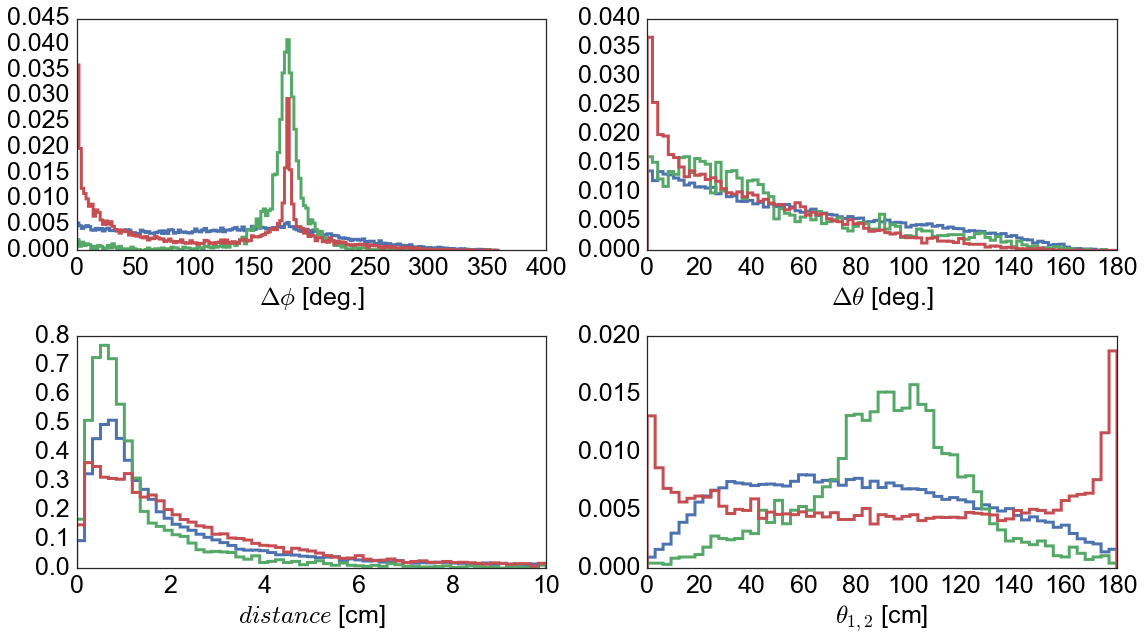

In [244]:
# fig=plt.figure(figsize=(16,9))
# plot_feature_2tracks_clusters(i=1,var='l_long',x_label='$l_{long}$ [cm]',bins=np.linspace(0,300,100),do_add_legend=True,fig=fig)
# plot_feature_2tracks_clusters(i=2,var='l_short',x_label='$l_{short}$ [cm]',bins=np.linspace(0,100,100),fig=fig)
# plot_feature_2tracks_clusters(i=3,var='PIDA_long',x_label='$(pid_A)_{long}$',bins=np.linspace(0,60,60),fig=fig)
# plot_feature_2tracks_clusters(i=4,var='PIDA_short',x_label='$(pid_A)_{short}$',bins=np.linspace(0,60,60),fig=fig)
# plt.tight_layout()

fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='delta_phi',x_label='$\\Delta \\phi$ [deg.]',bins=np.linspace(0,360,180),fig=fig)
plot_feature_2tracks_clusters(i=2,var='delta_theta',x_label='$\\Delta \\theta$ [deg.]',bins=np.linspace(0,180,90),fig=fig)
plot_feature_2tracks_clusters(i=3,var='distance',x_label='$distance$ [cm]',bins=np.linspace(0,10,60),fig=fig)
plot_feature_2tracks_clusters(i=4,var='2_tracks_angle',x_label='$\\theta_{1,2}$ [cm]',mul=180./np.pi,bins=np.linspace(0,180,60),fig=fig)
plt.tight_layout()


fig=plt.figure(figsize=(16,9))
plot_feature_2tracks_clusters(i=1,var='theta_long',x_label='$\\theta_{short}$ [cm]',mul=180./np.pi,bins=np.linspace(0,180,60),fig=fig)
plot_feature_2tracks_clusters(i=2,var='theta_short',x_label='$\\theta_{long}$ [cm]',mul=180./np.pi,bins=np.linspace(0,180,60),fig=fig)
plot_feature_2tracks_clusters(i=4,var='vertex_y',x_label='y-posision of the vertex [cm]',bins=np.linspace(-100,100,100),fig=fig)
plt.tight_layout()


# fig=plt.figure(figsize=(16,9))
# plot_feature_2tracks_clusters(i=1,var='cosmicscore_large_pida',x_label='cosmic-score for large-pid-A',bins=np.linspace(0,1,60),fig=fig)
# plot_feature_2tracks_clusters(i=2,var='cosmicscore_small_pida',x_label='cosmic-score for large-pid-A',bins=np.linspace(0,1,60),fig=fig)
# plot_feature_2tracks_clusters(i=4,var='cfdistance_large_pida',x_label='closest flash distance large-pid-A',bins=np.linspace(-100,100,100),fig=fig)
# plt.tight_layout()

# fig=plt.figure(figsize=(16,9))
# plot_feature_2tracks_clusters(i=1,var='cfdistance_small_pida',x_label='closest flash distance small-pid-A',bins=np.linspace(-100,100,100),fig=fig)
# plot_feature_2tracks_clusters(i=2,var='starty_short',x_label='$y_{start}$ short track',bins=np.linspace(-110,110,100),fig=fig)
# plot_feature_2tracks_clusters(i=3,var='starty_long',x_label='$y_{start}$ long track',bins=np.linspace(-110,110,100),fig=fig)
# plot_feature_2tracks_clusters(i=4,var='reco_CC1p_theta_pq',x_label='reconstructed $\\theta_{p,q}$ [deg.]',bins=np.linspace(0,180,90),fig=fig)
# plt.tight_layout()




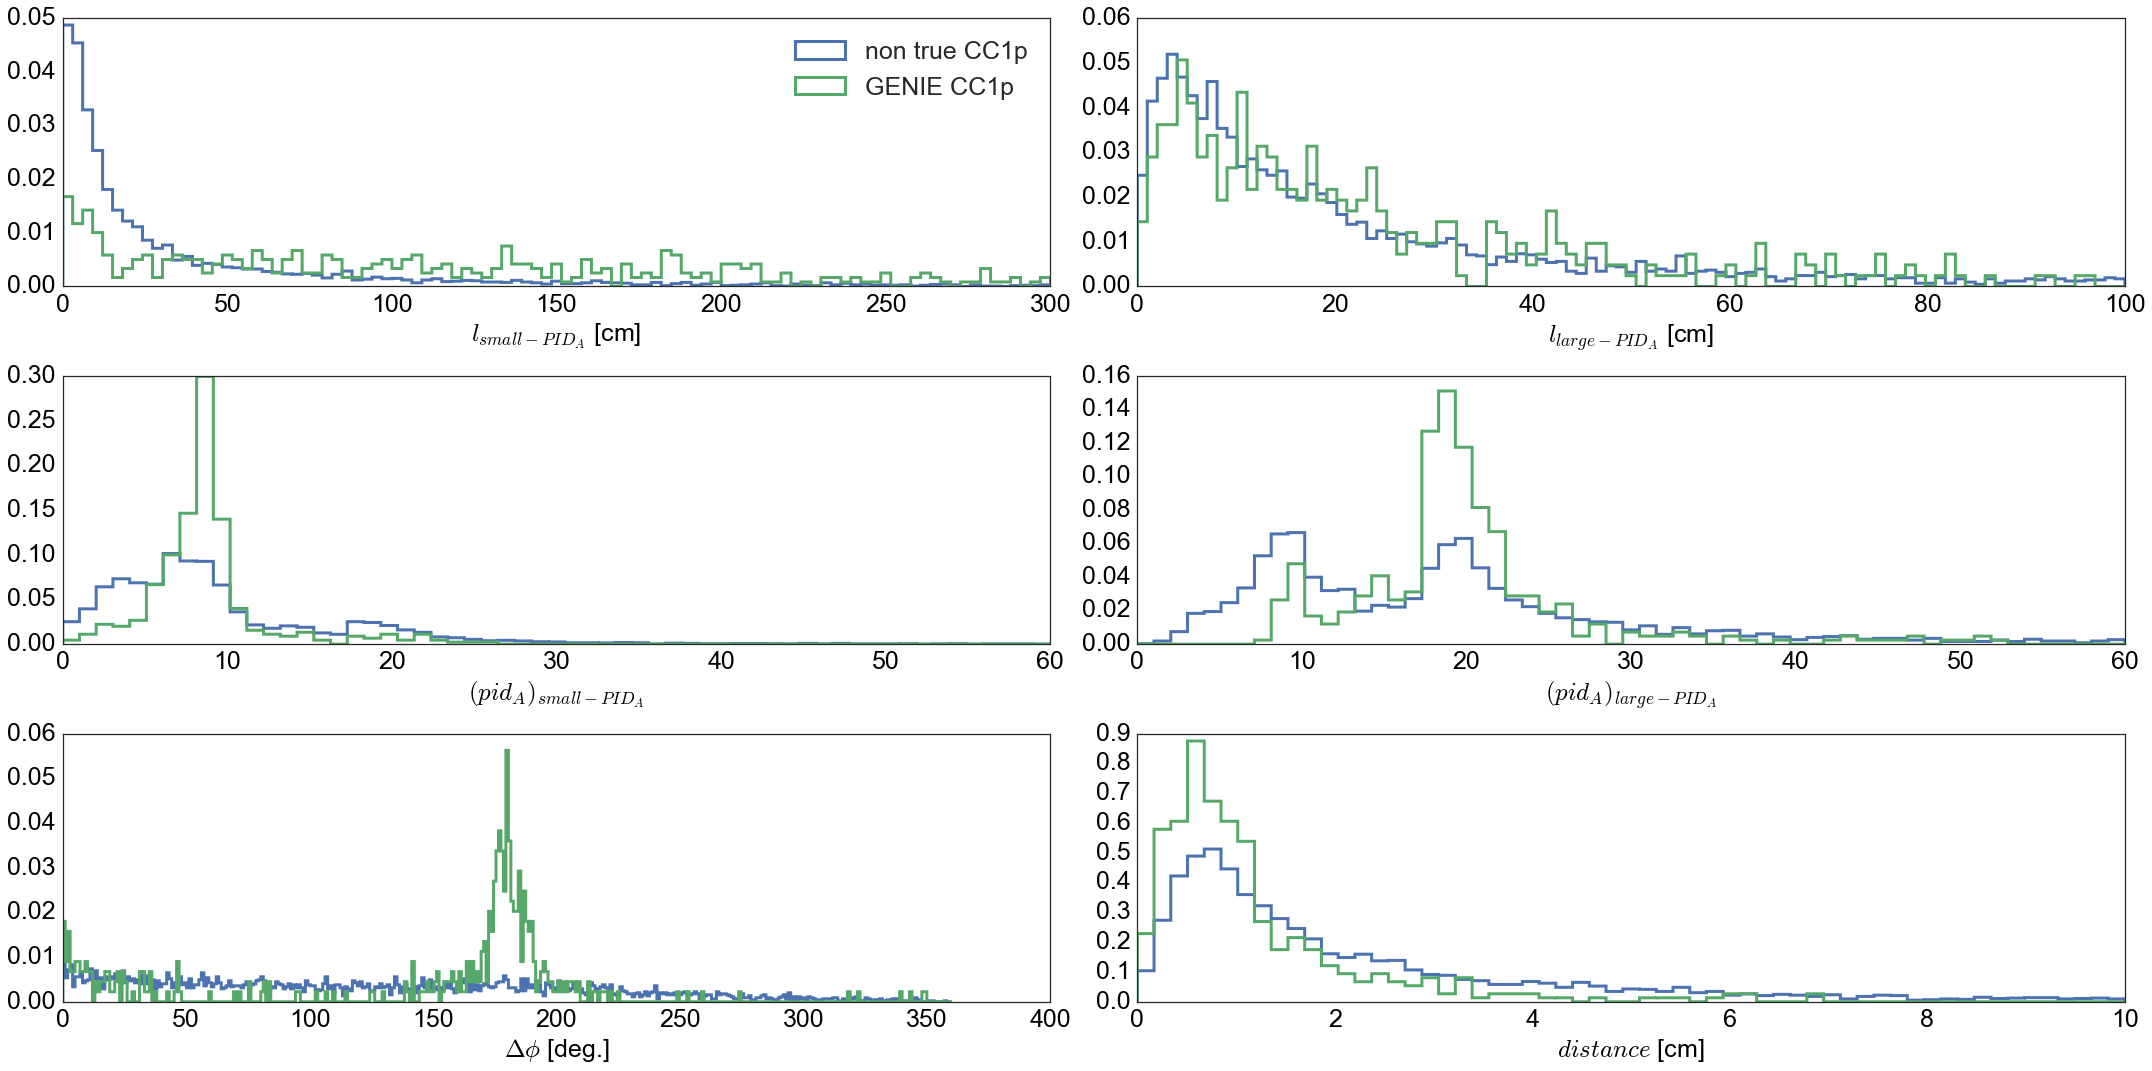

In [73]:
# MCevents.cfdistance_long

fig=plt.figure(figsize=(30,15))

ax = fig.add_subplot(3,2,1)
bins=np.linspace(0,300,100)
plt.hist(MCeventsNonTrueCC1p['l_small_pida'],normed=1,label='non true CC1p',bins=bins,histtype='step',linewidth=3)
plt.hist(MCeventsTrueCC1p['l_small_pida'],normed=1,label='GENIE CC1p',bins=bins,histtype='step',linewidth=3)
ax.legend(fontsize=25)
set_axes(ax,x_label='$l_{small-PID_A}$ [cm]')

ax = fig.add_subplot(3,2,2)
bins=np.linspace(0,100,100)
plt.hist(MCeventsNonTrueCC1p['l_large_pida'],normed=1,label='non true CC1p',bins=bins,histtype='step',linewidth=3)
plt.hist(MCeventsTrueCC1p['l_large_pida'],normed=1,label='GENIE CC1p',bins=bins,histtype='step',linewidth=3)
set_axes(ax,x_label='$l_{large-PID_A}$ [cm]')


ax = fig.add_subplot(3,2,3)
bins=np.linspace(0,60,60)
plt.hist(MCeventsNonTrueCC1p['PIDA_small_pida'],normed=1,label='non true CC1p',bins=bins,histtype='step',linewidth=3)
plt.hist(MCeventsTrueCC1p['PIDA_small_pida'],normed=1,label='GENIE CC1p',bins=bins,histtype='step',linewidth=3)
set_axes(ax,x_label='$(pid_A)_{small-PID_A}$')


ax = fig.add_subplot(3,2,4)
bins=np.linspace(0,60,60)
plt.hist(MCeventsNonTrueCC1p['PIDA_large_pida'],normed=1,label='non true CC1p',bins=bins,histtype='step',linewidth=3)
plt.hist(MCeventsTrueCC1p['PIDA_large_pida'],normed=1,label='GENIE CC1p',bins=bins,histtype='step',linewidth=3)
set_axes(ax,x_label='$(pid_A)_{large-PID_A}$')


ax = fig.add_subplot(3,2,5)
bins=np.linspace(0,360,360)
plt.hist(MCeventsNonTrueCC1p['delta_phi'],normed=1,label='non true CC1p',bins=bins,histtype='step',linewidth=3)
plt.hist(MCeventsTrueCC1p['delta_phi'],normed=1,label='GENIE CC1p',bins=bins,histtype='step',linewidth=3)
set_axes(ax,x_label='$\\Delta \\phi$ [deg.]')



ax = fig.add_subplot(3,2,6)
bins=np.linspace(0,10,60)
plt.hist(MCeventsNonTrueCC1p['distance'],normed=1,label='non true CC1p',bins=bins,histtype='step',linewidth=3)
plt.hist(MCeventsTrueCC1p['distance'],normed=1,label='GENIE CC1p',bins=bins,histtype='step',linewidth=3)
set_axes(ax,x_label='$distance$ [cm]')




plt.tight_layout()


# efficiency and purity for all cuts in 1d

In [6]:
def plot_pur_eff (cut_name='maximal distance between tracks',
                  cut_var ='distance',
                  cut_type= 'max',
                  x_label = 'maximal tracks distance [cm]',
                  xmin=0.1, xmax=10 , Nbins=10, y_lim=None):
    
    eff , eff_err , pur , pur_err = [] , [] ,  [] , []
    x_array = np.linspace(xmin,xmax,Nbins)

    for x in x_array:
        
        if cut_type is 'max':
            reduced_CC1p = truthCC1p[truthCC1p[cut_var]<x]
            reduced_MCevents = MCevents[MCevents[cut_var]<x]
            
        elif cut_type is 'min':
            reduced_CC1p = truthCC1p[truthCC1p[cut_var]>x]
            reduced_MCevents = MCevents[MCevents[cut_var]>x]

        reduced_MCevents_trueCC1p = reduced_MCevents[reduced_MCevents.truth_cc1p==1]



        denominator = len(truthCC1p) if len(truthCC1p)>0 else 1e20
        eff.append( 100.*float(len(reduced_CC1p))/len(truthCC1p) )
        den2 = len(reduced_CC1p) if len(reduced_CC1p)>0 else 1e20
        eff_err.append( eff[-1]*np.sqrt( 1./denominator + 1./den2 ) )
        
        denominator = len(reduced_MCevents) if len(reduced_MCevents)>0 else 1e20
        pur.append( 100.*float(len(reduced_MCevents_trueCC1p))/denominator)
        den2 = len(reduced_MCevents_trueCC1p) if len(reduced_MCevents_trueCC1p)>0 else 1e20
        pur_err.append( pur[-1]*np.sqrt( 1./denominator + 1./den2 ) )


    fig, ax = plt.subplots(figsize=(16,9))
    plt.errorbar(x_array , y=eff, yerr=eff_err , fmt='o'  , label='CC1p selection efficiency')
    plt.errorbar(x_array , y=pur, yerr=pur_err , fmt='ro' , label='CC1p purity of selected sample'  )
    set_axes(ax,x_label=x_label, y_label='efficiency/purity [%]',fontsize=35 )

    ax.legend(loc='best',fontsize=25)
    if y_lim is not None:
        ax.set_ylim(0,101)
    ax.grid(linestyle='--',alpha=0.5)
    fig.tight_layout()



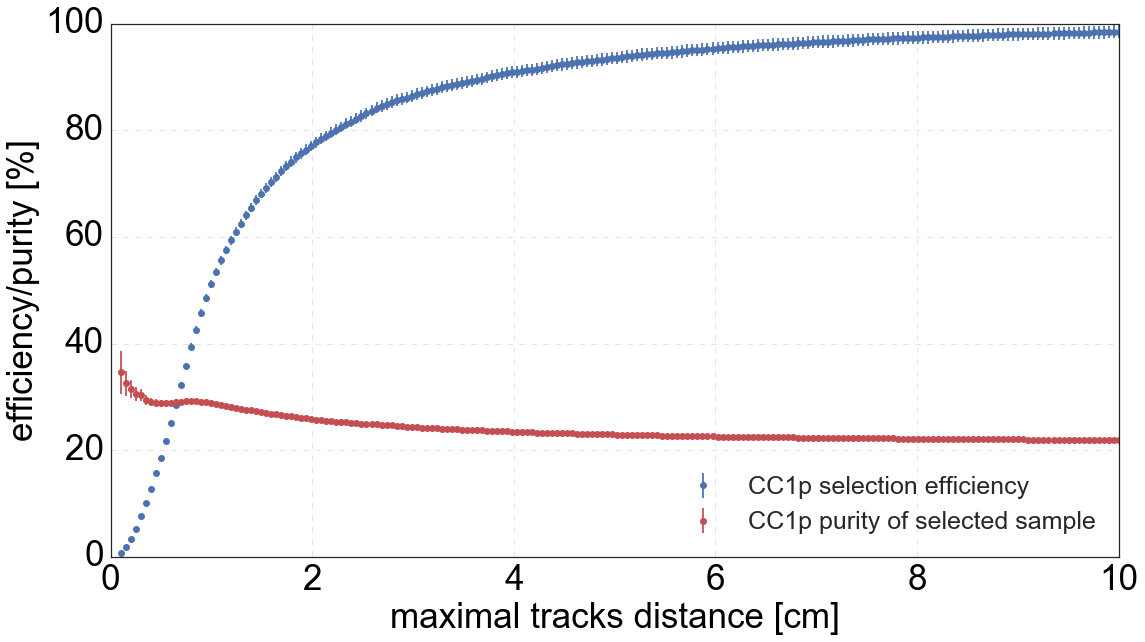

In [40]:
plot_pur_eff (    cut_var ='distance',
                  cut_type= 'max',
                  x_label = 'maximal tracks distance [cm]',
                  xmin=0.1, xmax=10 , Nbins=200, y_lim=None)

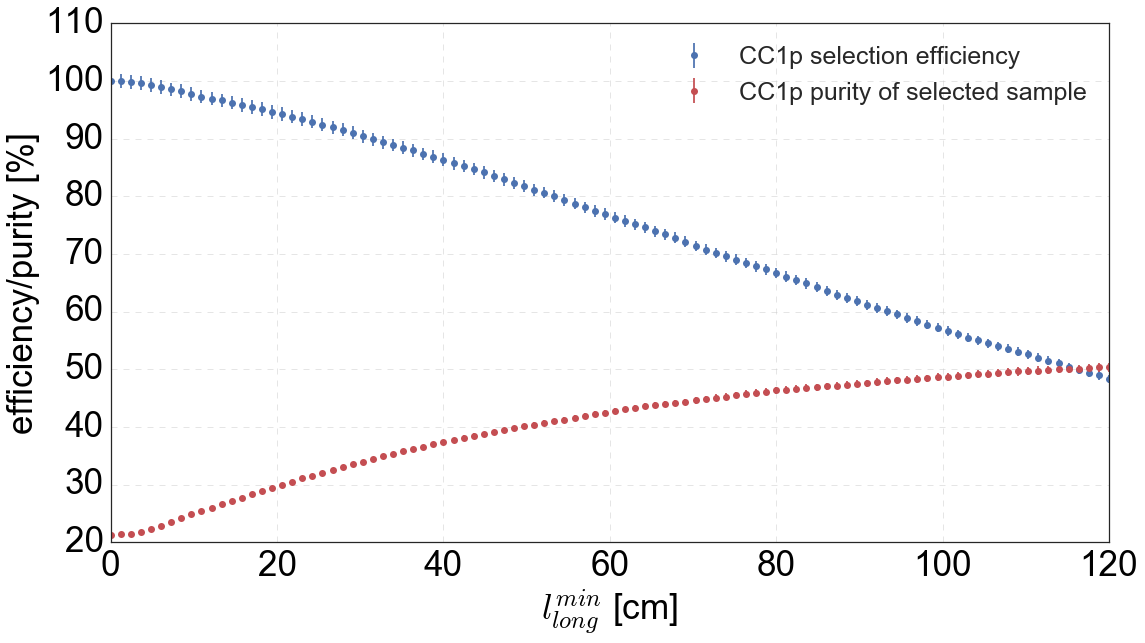

In [39]:
plot_pur_eff (cut_var ='l_long',                  
              cut_type= 'min',              
              x_label = '$l_{long}^{min}$ [cm]',              
              xmin=0.0, xmax=120 , Nbins=100)

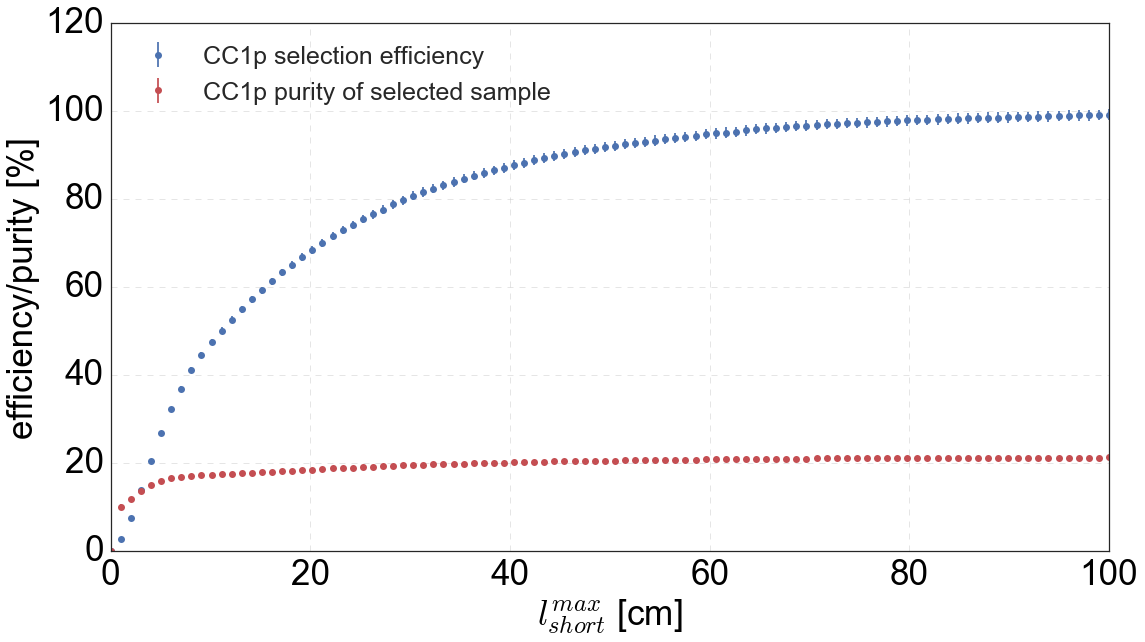

In [43]:
plot_pur_eff (cut_var ='l_short',                  
              cut_type= 'max',
              x_label = '$l_{short}^{max}$ [cm]',              
              xmin=0.0, xmax=100 , Nbins=100)

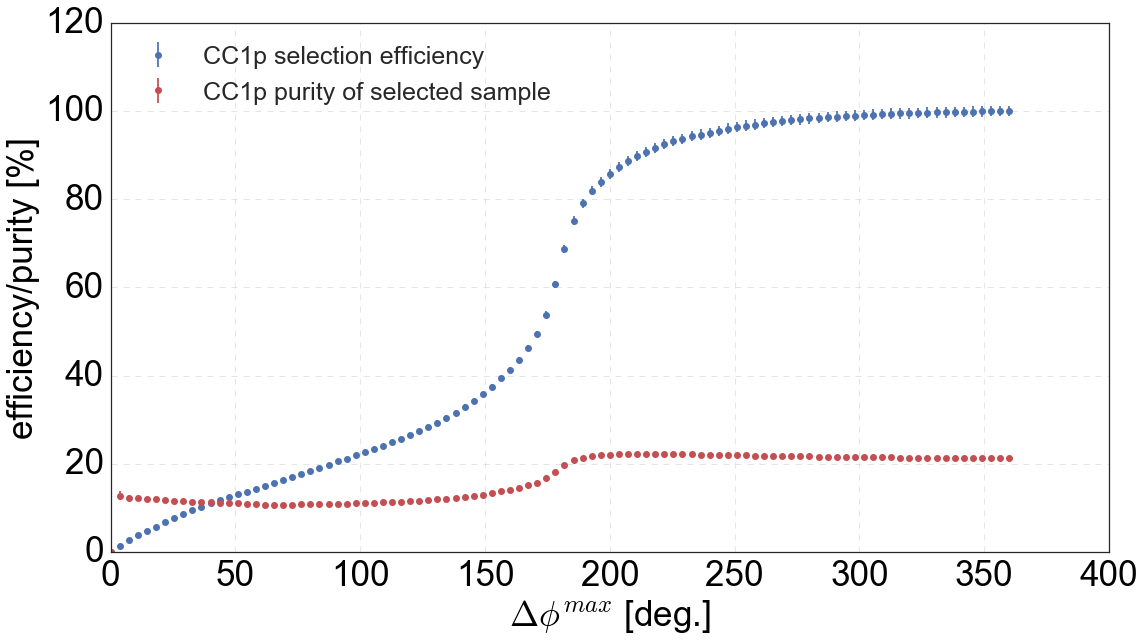

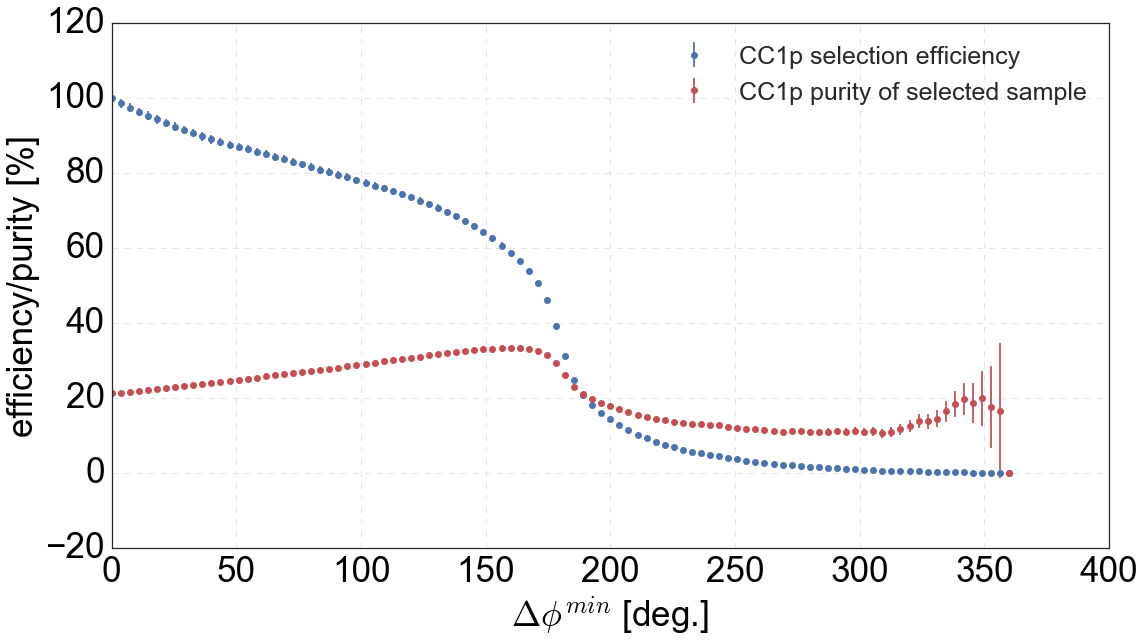

In [46]:
plot_pur_eff (cut_var ='delta_phi',                  
              cut_type= 'max',
              x_label = '$\\Delta \\phi ^{max}$ [deg.]',              
              xmin=0.0, xmax=360 , Nbins=100)
plot_pur_eff (cut_var ='delta_phi',                  
              cut_type= 'min',
              x_label = '$\\Delta \\phi ^{min}$ [deg.]',
              xmin=0.0, xmax=360 , Nbins=100)

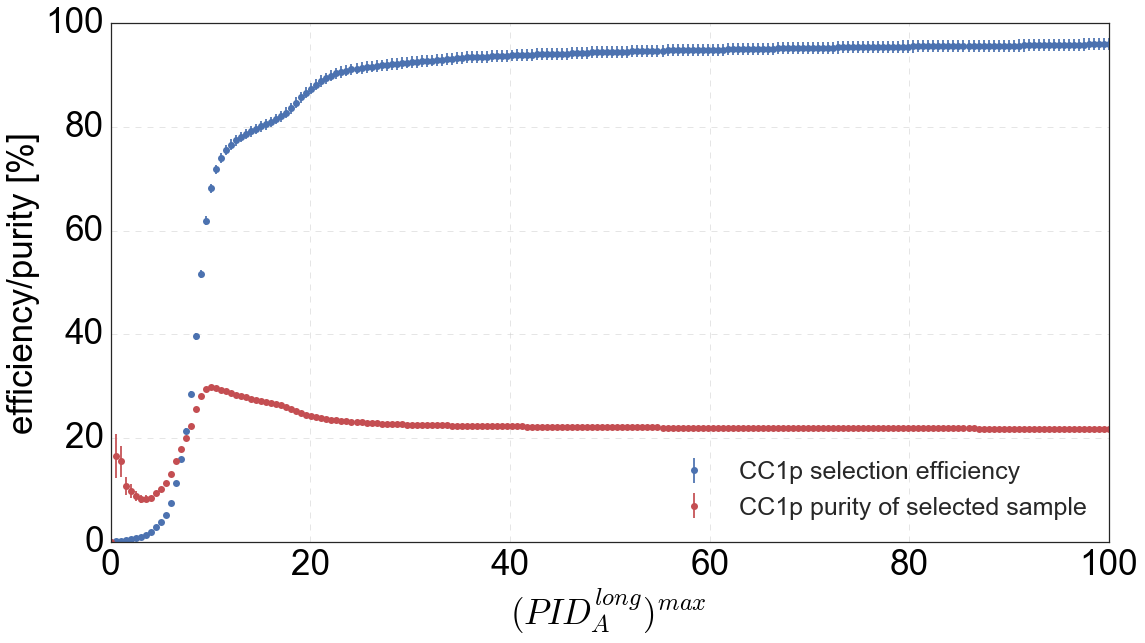

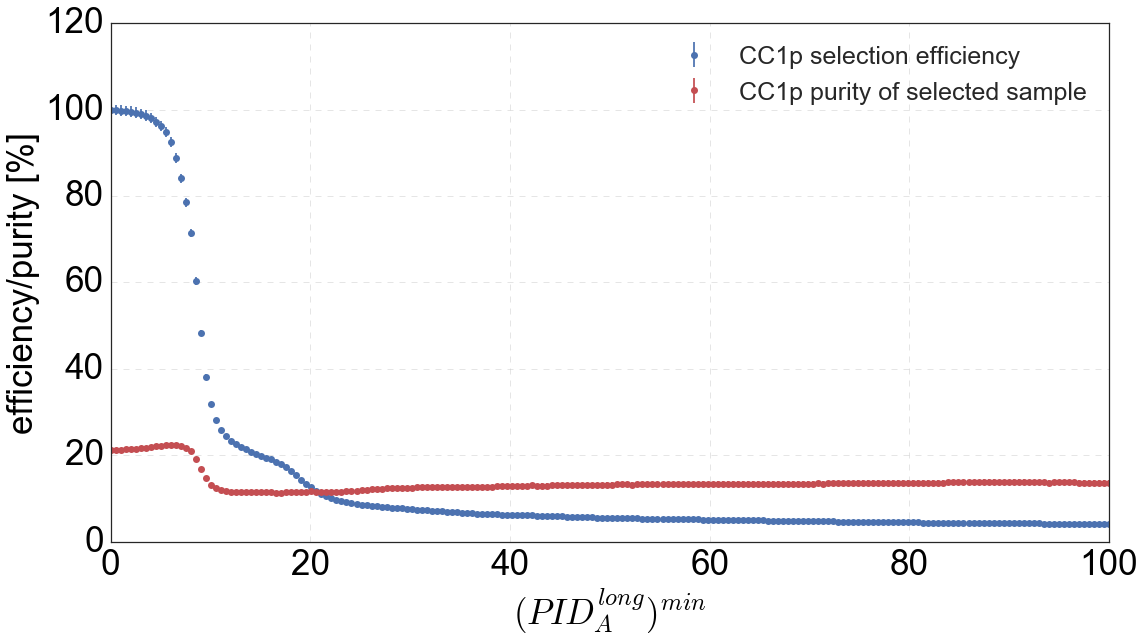

In [52]:
plot_pur_eff (cut_var ='PIDA_long',
              cut_type= 'max',
              x_label = '$(PID_A^{long}) ^{max}$ ',
              xmin=0.0, xmax=100 , Nbins=200)
plot_pur_eff (cut_var ='PIDA_long',             
              cut_type= 'min',
              x_label = '$(PID_A^{long}) ^{min}$',
              xmin=0.0, xmax=100 , Nbins=200)

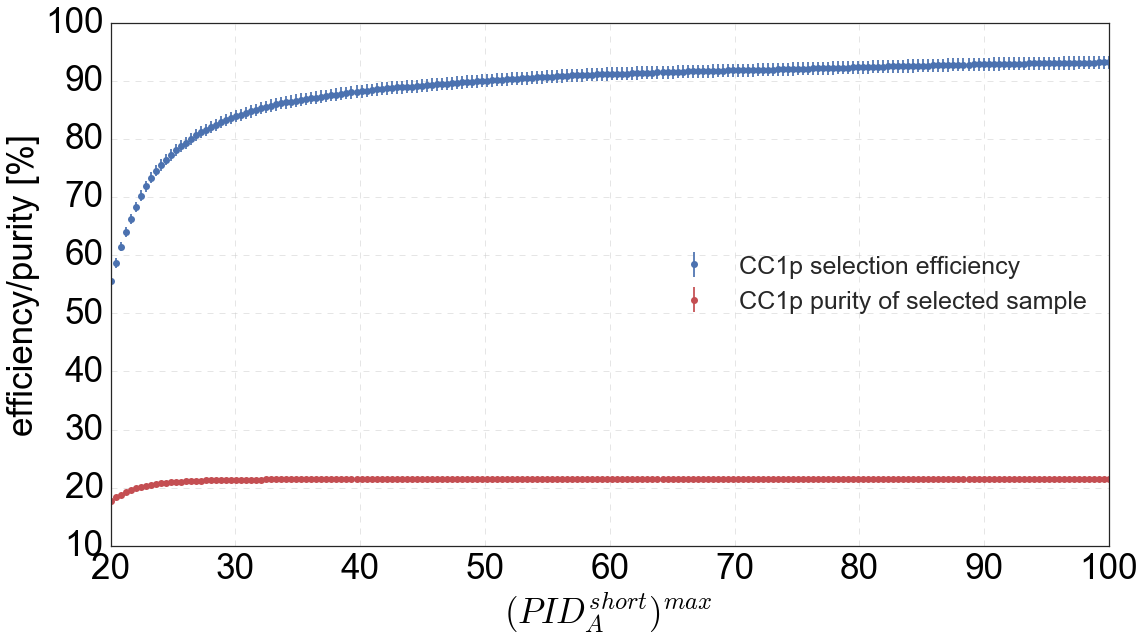

In [57]:
plot_pur_eff (cut_var ='PIDA_short',
              cut_type= 'max',
              x_label = '$(PID_A^{short}) ^{max}$ ',
              xmin=20, xmax=100 , Nbins=200)
plot_pur_eff (cut_var ='PIDA_short',             
              cut_type= 'min',
              x_label = '$(PID_A^{short}) ^{min}$',
              xmin=0.0, xmax=40 , Nbins=100)

# find the golden point for the cuts

In [8]:
cuts_combination_filename = "/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/cuts_combinations.csv"

In [ ]:
dmax = np.linspace(0,10,20)
llongmin = np.linspace(10,80,20)
dphimin = np.linspace(0,150,20)
PIDA_short_min = np.linspace(5,20,20)
PIDA_long_min = np.linspace(0,5,5)

cuts_combinations = pd.DataFrame()

for i,d in zip(range(len(dmax)),dmax):
    print '%.0f'%(100*float(i)/len(dmax))+'%'
    for l in llongmin:        
        for dphi in dphimin:
            for PIDA_smin in PIDA_short_min:
                for PIDA_lmin in PIDA_long_min:
                    
                    reduced_CC1p = truthCC1p[  (truthCC1p['distance']<d) 
                                             & (truthCC1p['l_long']>l)
                                             & (truthCC1p['delta_phi']>dphi)
                                             & (truthCC1p['PIDA_short']>PIDA_smin)
                                             & (truthCC1p['PIDA_long']>PIDA_lmin)
                                            ]
                    reduced_MCevents = MCevents[  (MCevents['distance']<d) 
                                                & (MCevents['l_long']>l)
                                                & (MCevents['delta_phi']>dphi)
                                                & (MCevents['PIDA_short']>PIDA_smin)
                                                & (MCevents['PIDA_long']>PIDA_lmin)                                            
                                               ]
                    reduced_MCevents_trueCC1p = reduced_MCevents[reduced_MCevents['truth_cc1p']==1]

                    
                    den1 = len(truthCC1p) if len(truthCC1p)>0 else 1e20
                    eff = 100.*float(len(reduced_CC1p))/den1 
                    if eff<50: continue
                    den2 = len(reduced_CC1p) if len(reduced_CC1p)>0 else 1e20
                    eff_err = eff*np.sqrt( 1./den1 + 1./den2 )
        
                    den1 = len(reduced_MCevents) if len(reduced_MCevents)>0 else 1e20
                    pur =  100.*float(len(reduced_MCevents_trueCC1p))/den1
                    if pur<20: continue
                    den2 = len(reduced_MCevents_trueCC1p) if len(reduced_MCevents_trueCC1p)>0 else 1e20
                    pur_err = pur*np.sqrt( 1./den1 + 1./den2 ) 

                    cuts_combinations = pd.DataFrame({'distance_max':d,
                                                     'l_long_min':l,
                                                     'delta_phi_min':dphi,
                                                     'PIDA_short_min':PIDA_smin,
                                                     'PIDA_long_min':PIDA_lmin,
                                                      'efficiency':eff,
                                                      'eff_err':eff_err,
                                                      'purity':pur,
                                                      'pur_err':pur_err,
                                                     }
                                                     ,index=[0])

                    stream_dataframe_to_file( cuts_combinations , cuts_combination_filename )

0%


In [9]:
cuts_combinations = pd.read_csv(cuts_combination_filename)
print len(cuts_combinations)

147259


In [15]:
cuts_combinations['eff*pur'] = cuts_combinations['efficiency'] * cuts_combinations['purity']

In [22]:
cuts_combinations[cuts_combinations.index==cuts_combinations[cuts_combinations.efficiency>80]['eff*pur'].argmax()]

,PIDA_long_min,PIDA_short_min,delta_phi_min,distance_max,eff_err,efficiency,l_long_min,pur_err,purity,eff*pur
26,0.0,8.0,0.0,10.0,1.02745,80.6119,35.0,0.517277,45.2536,3647.978678


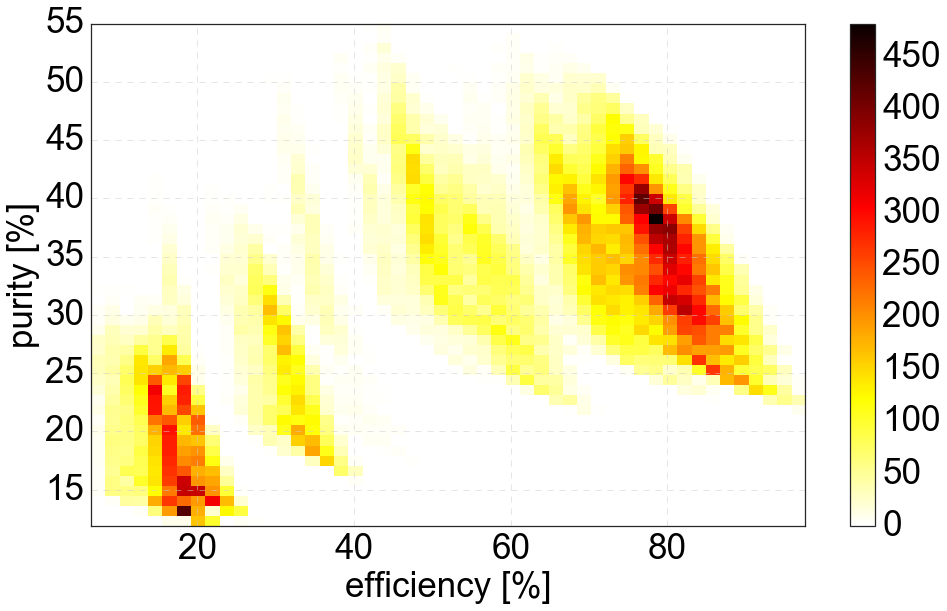

In [75]:
fig,ax = plt.subplots(figsize=(16,9))
plot_2d_histogram(data=cuts_combinations[cuts_combinations.efficiency>0] , varx='efficiency' , vary='purity' ,fontsize=35,
                  x_label = 'efficiency [%]', y_label='purity [%]',
                  binsx=50, binsy=50, ax=ax )
ax.grid(linestyle='--',alpha=0.5)



In [180]:

# plot_2d_hist(recoGENIECC1p.pdg_large_pida , recoGENIECC1p.pdg_small_pida);
# plot_2d_hist(recoGENIECC1p.l_small_pida , recoGENIECC1p.l_muon);
# plot_2d_hist(recoGENIECC1p.l_small_pida , recoGENIECC1p.l_muon);
# plot_2d_hist(MCeventsTrueCC1p.pdg_long,MCeventsTrueCC1p.pdg_short);
# plot_2d_hist(recoGENIECC1p.pdg_long,recoGENIECC1p.pdg_short,bins=(np.linspace(0,2220,2220),np.linspace(0,2220,2220)));
# recoGENIECC1p.plot.scatter('pdg_long','pdg_short')
# recoGENIECC1p.plot.scatter('truth_theta_pq','reco_CC1p_theta_pq')
# recoGENIECC1p.plot.scatter('l_long','pdg_long')
# recoGENIECC1p.plot.scatter('l_short','pdg_short')
# recoGENIECC1p.plot.scatter('l_large_pida','pdg_large_pida')
# recoGENIECC1p.plot.scatter('l_small_pida','pdg_small_pida')
# recoGENIECC1p.plot.hexbin('l_proton','l_short')
# recoGENIECC1p.plot.scatter('l_proton','l_short')
# recoGENIECC1p.plot.scatter('l_muon','l_short')
# plt.hist(recoGENIECC1p.l_long - recoGENIECC1p.l_short);
# plt.hist(recoGENIECC1p.l_small_pida - recoGENIECC1p.l_large_pida);
# plt.hist(recoGENIECC1p.PIDA_large_pida - recoGENIECC1p.PIDA_small_pida , bins=np.linspace(0,100,100) );
# plt.hist2d(recoGENIECC1p.PIDA_large_pida, recoGENIECC1p.l_large_pida , bins=np.linspace(0,100,100) );
# plt.hist2d(recoGENIECC1p.PIDA_small_pida, recoGENIECC1p.l_small_pida , bins=np.linspace(0,300,100) );
# plot_2d_hist(recoGENIECC1p.truth_P_muon , recoGENIECC1p.reco_CC1p_Pmu ,bins=np.linspace(0,1.5,50));
# plot_2d_hist(recoGENIECC1p.truth_P_proton , recoGENIECC1p.reco_CC1p_Pp ,bins=np.linspace(0,1.5,50));
# plot_2d_hist(recoGENIECC1p.truth_Ev , recoGENIECC1p.reco_CC1p_Ev );
# plot_2d_hist(recoGENIECC1p.truth_q , recoGENIECC1p.reco_CC1p_q );
# plot_2d_hist(recoGENIECC1p.truth_q_x , recoGENIECC1p.reco_CC1p_q_x );
# plot_2d_hist(recoGENIECC1p.truth_q_y , recoGENIECC1p.reco_CC1p_q_y );
# plot_2d_hist(recoGENIECC1p.truth_q_z , recoGENIECC1p.reco_CC1p_q_z );
# recoGENIECC1p.plot.scatter('truth_Pmu_y','reco_CC1p_Pmu_y')
# recoGENIECC1p[recoGENIECC1p.muon_track_is_flipped==1].plot.scatter('truth_Pmu_z','reco_CC1p_Pmu_z')
# recoGENIECC1p[recoGENIECC1p.muon_track_is_flipped==0].plot.scatter('truth_Pmu_z','reco_CC1p_Pmu_z')
# plot_2d_hist(recoGENIECC1p[recoGENIECC1p.muon_track_is_flipped==1].truth_Pmu_x , recoGENIECC1p[recoGENIECC1p.muon_track_is_flipped==1].reco_CC1p_Pmu_x );
# plot_2d_hist(recoGENIECC1p.truth_Pmu_y , recoGENIECC1p.reco_CC1p_Pmu_y );
# plot_2d_hist(recoGENIECC1p.truth_Pmu_z , recoGENIECC1p.reco_CC1p_Pmu_z );
# plot_2d_hist(recoGENIECC1p.truth_Pp_x , recoGENIECC1p.reco_CC1p_Pp_x );
# plot_2d_hist(recoGENIECC1p.truth_Pp_y , recoGENIECC1p.reco_CC1p_Pp_y );
# plot_2d_hist(recoGENIECC1p.truth_Pp_z , recoGENIECC1p.reco_CC1p_Pp_z );

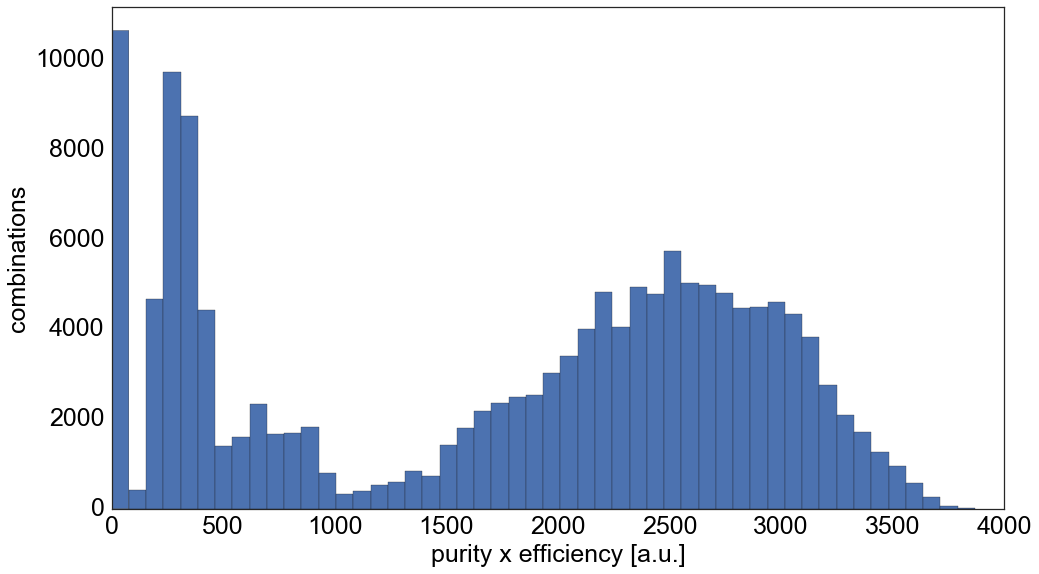

In [18]:
plot_1d_hist(cuts_combinations['eff*pur'],xlabel='purity x efficiency [a.u.]',ylabel='combinations',figsize=(16,9));

In [19]:
cuts_combinations[(cuts_combinations.efficiency>74)&(cuts_combinations.purity>50)]

,PIDA_long_min,PIDA_short_min,delta_phi_min,distance_max,eff_err,efficiency,l_long_min,pur_err,purity
143306,0.00000,8.0,0.0,5.55556,0.969791,74.3837,44.4444,0.605828,50.0854
143307,1.66667,8.0,0.0,5.55556,0.968780,74.2749,44.4444,0.606343,50.0905


# true CC1p pairs - plots, for enhanecemnt of CC1p search

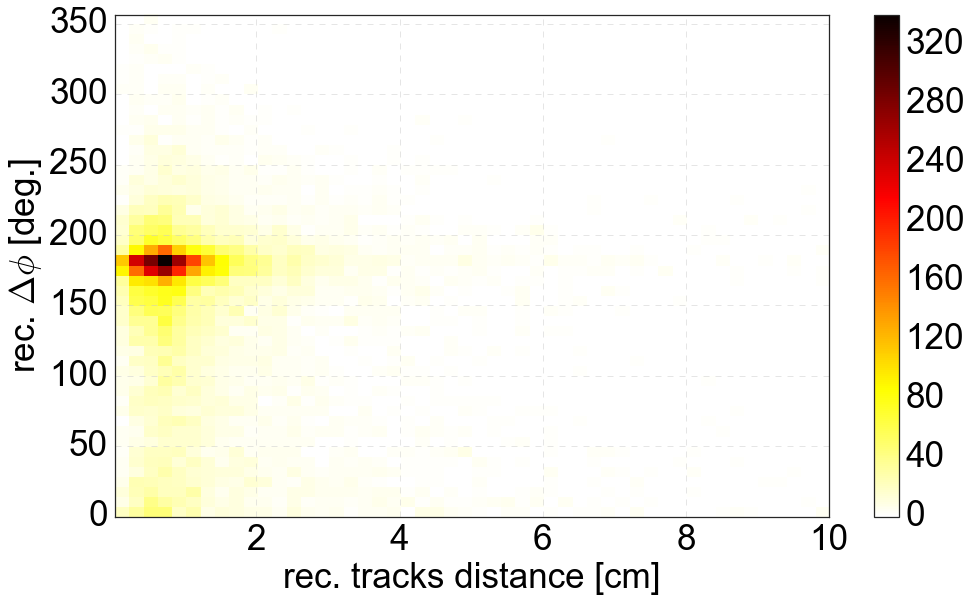

In [22]:
fig,ax = plt.subplots(figsize=(16,9))
plot_2d_histogram(data=truthCC1p , varx='distance' , vary='delta_phi' ,fontsize=35,
                  x_label = 'rec. tracks distance [cm]', y_label='rec. $\\Delta \\phi$ [deg.]',
                  binsx=50, binsy=50, ax=ax , do_save_fig=False,
                  do_add_title=False)
ax.grid(linestyle='--',alpha=0.5)


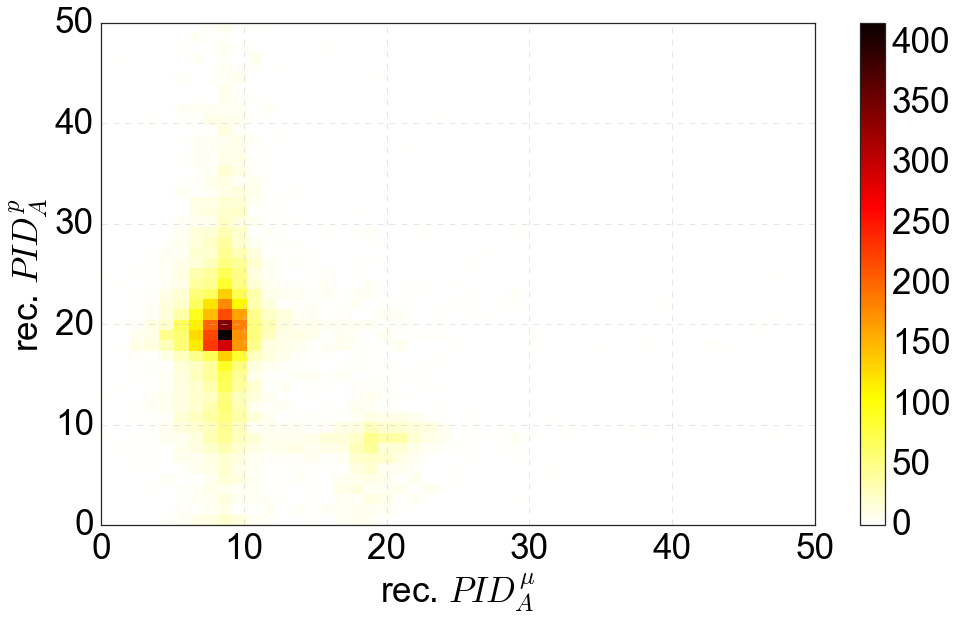

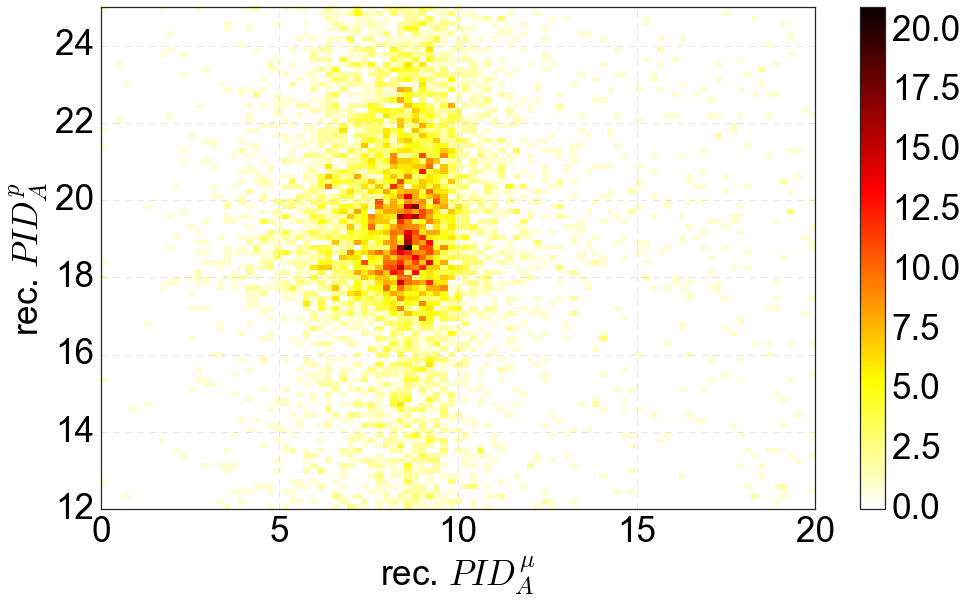

In [157]:
fig,ax = plt.subplots(figsize=(16,9))
plt.plot([0,0],[100,100],linestyle='--',linewidth=3,color='blue')
plot_2d_histogram(data=truthCC1p , varx='PIDA_muon' , vary='PIDA_proton' ,fontsize=35,
                  x_label = 'rec. $PID_A^{\\mu}$', y_label='rec. $PID_A^{p}$',
                  binsx=np.linspace(0,50,50), binsy=np.linspace(0,50,50), ax=ax , do_save_fig=False,
                  do_add_title=False)
ax.grid(linestyle='--',which='both',alpha=0.5)
# zoomin
fig,ax = plt.subplots(figsize=(16,9))
plt.plot([0,0],[100,100],linestyle='--',linewidth=3,color='blue')
plot_2d_histogram(data=truthCC1p , varx='PIDA_muon' , vary='PIDA_proton' ,fontsize=35,
                  x_label = 'rec. $PID_A^{\\mu}$', y_label='rec. $PID_A^{p}$',
                  binsx=np.linspace(0,20,100), binsy=np.linspace(12,25,100), ax=ax , do_save_fig=False,
                  do_add_title=False)
ax.grid(linestyle='--',which='both',alpha=0.5)

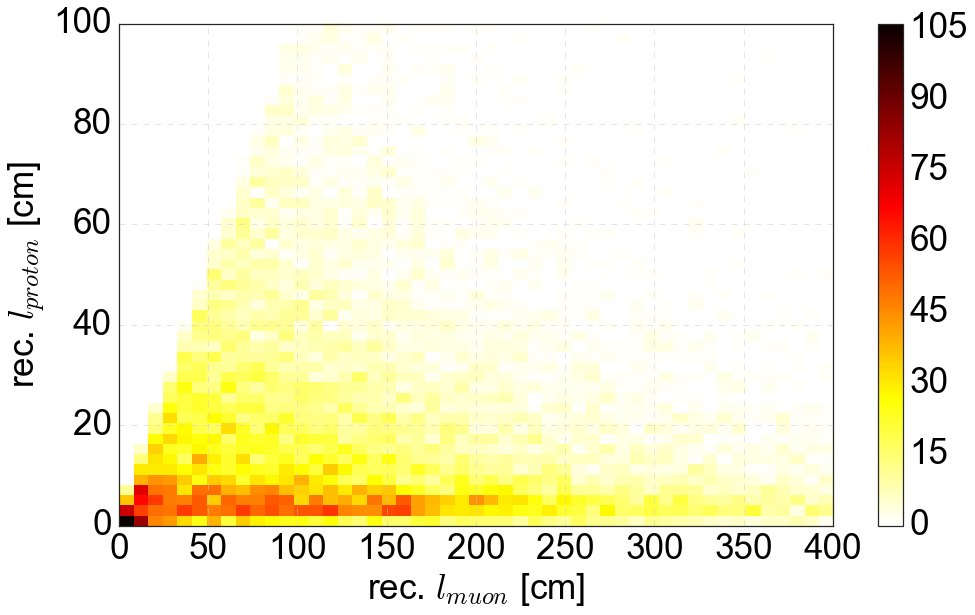

In [5]:
fig,ax = plt.subplots(figsize=(16,9))
plt.plot([0,0],[100,100],linestyle='--',linewidth=3,color='blue')
plot_2d_histogram(data=truthCC1p , varx='l_muon' , vary='l_proton' ,fontsize=35,
                  x_label = 'rec. $l_{muon}$ [cm]', y_label='rec. $l_{proton}$ [cm]',
                  binsx=np.linspace(0,400,50), binsy=np.linspace(0,100,50), ax=ax , do_save_fig=False,
                  do_add_title=False)
ax.grid(linestyle='--',alpha=0.5)

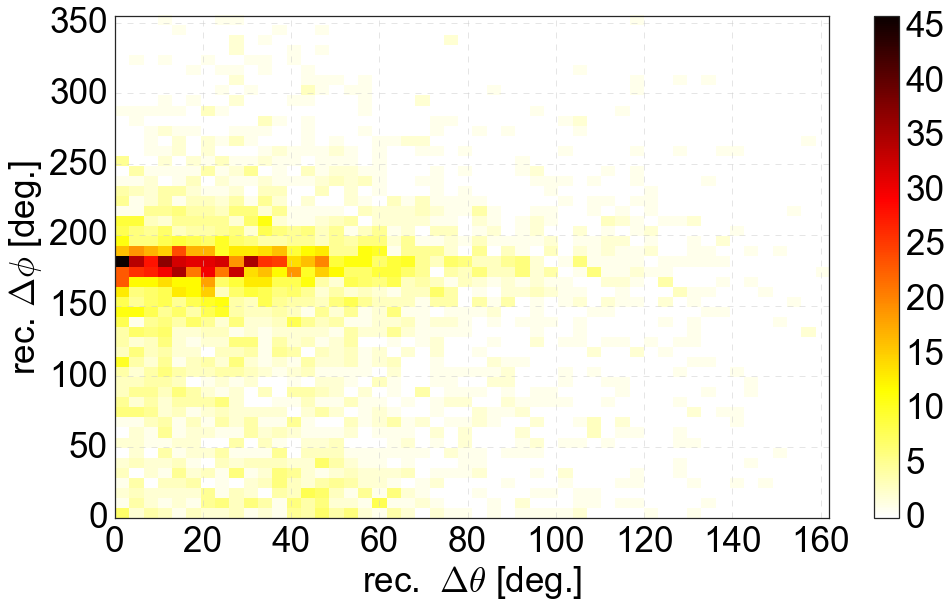

In [145]:
fig,ax = plt.subplots(figsize=(16,9))
plot_2d_histogram(data=truthCC1p , varx='delta_theta' , vary='delta_phi' ,fontsize=35,
                  x_label = 'rec.  $\\Delta \\theta$ [deg.]', y_label='rec. $\\Delta \\phi$ [deg.]',
                  binsx=50, binsy=50, ax=ax)
ax.grid(linestyle='--',alpha=0.5)



# study the efficiency as a function only one the selection cut at a time
(the purity can only be studied later after choosing the selection cuts and runnig on the MC sample)

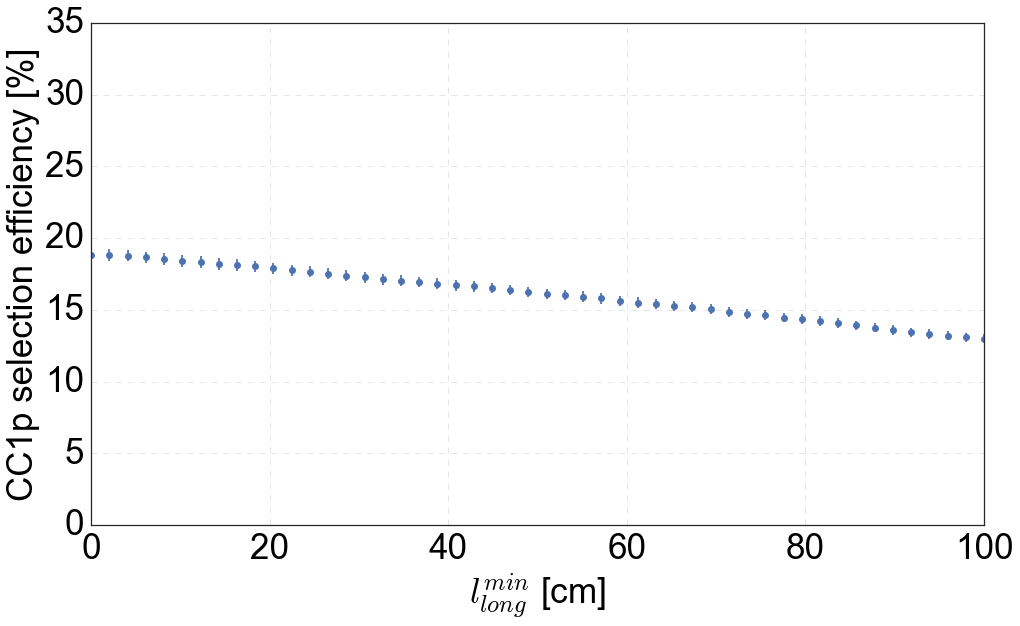

In [23]:
# efficiency as a function of minimal l_long
efficiency_l_long , eff_err_l_long = [] , []
l_long_min = np.linspace(0,100,50)
selected_truth_CC1p = truthCC1p[ (truthCC1p.l_short<10)                           
                                & (truthCC1p.distance<2) 
                                & (truthCC1p.delta_phi>150)
                                & (truthCC1p.delta_phi<210)]

for l_min in l_long_min:
    reduced_CC1p = selected_truth_CC1p[selected_truth_CC1p.l_long>l_min]
    selection_efficiency = 100.*float(len(reduced_CC1p))/len(truthCC1p)
    selection_eff_err = selection_efficiency*np.sqrt( 1./len(reduced_CC1p) + 1./len(truthCC1p) )
    efficiency_l_long.append( selection_efficiency )
    eff_err_l_long.append( selection_eff_err )
    
    
fig,ax = plt.subplots(figsize=(16,9))
plt.errorbar( l_long_min , y=efficiency_l_long, yerr=eff_err_l_long , fmt='o'  )
set_axes(ax,x_label = '$l_{long}^{min}$ [cm]', y_label='CC1p selection efficiency [%]',fontsize=35)
ax.set_ylim(0,35)
ax.grid(linestyle='--',alpha=0.5)

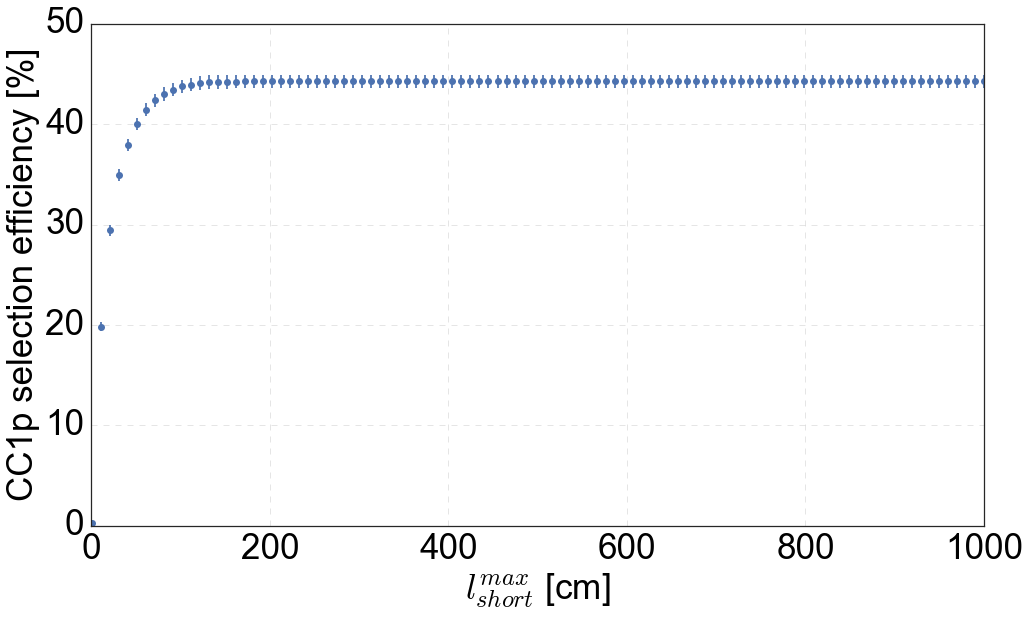

In [25]:
# efficiency as a function of maximal l_short
efficiency_l_short , eff_err_l_short = [] , []
l_short_max = np.linspace(1,1000,100)
selected_truth_CC1p = truthCC1p[ (truthCC1p.l_long>10)                           
                                & (truthCC1p.distance<2) 
                                & (truthCC1p.delta_phi>150)
                                & (truthCC1p.delta_phi<210)]

for l_max in l_short_max:
    reduced_CC1p = selected_truth_CC1p[selected_truth_CC1p.l_short<l_max]
    selection_efficiency = 100.*float(len(reduced_CC1p))/len(truthCC1p)
    selection_eff_err = selection_efficiency*np.sqrt( 1./len(reduced_CC1p) + 1./len(truthCC1p) )
    efficiency_l_short.append( selection_efficiency )
    eff_err_l_short.append( selection_eff_err )

fig,ax = plt.subplots(figsize=(16,9))
plt.errorbar( l_short_max , y=efficiency_l_short, yerr=eff_err_l_short , fmt='o'  )
set_axes(ax,x_label = '$l_{short}^{max}$ [cm]', y_label='CC1p selection efficiency [%]',fontsize=35)
ax.set_ylim(0,50)
ax.grid(linestyle='--',alpha=0.5)

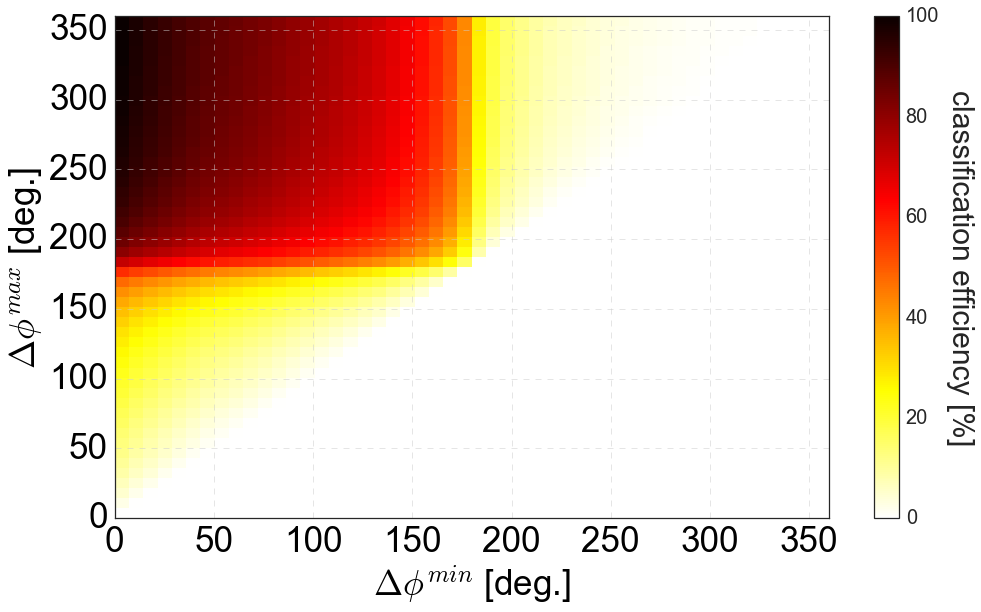

In [185]:
# efficiency as a function of delta_phi
dphi_min = np.linspace(0,360,50)
dphi_max = np.linspace(0,360,50)

eff_delta_phi = np.zeros((len(dphi_min),len(dphi_max)))
selected_truth_CC1p = truthCC1p

for i,d_min in zip(range(len(dphi_min)),dphi_min):
    for j,d_max in zip(range(len(dphi_max)),dphi_max):
        reduced_CC1p = selected_truth_CC1p[(selected_truth_CC1p.delta_phi>d_min)&(selected_truth_CC1p.delta_phi<d_max)]
        selection_efficiency = 100.*float(len(reduced_CC1p))/len(truthCC1p)
        # print 'd_min,d_max,selection_efficiency:',d_min,d_max,selection_efficiency
        eff_delta_phi[i][j] = selection_efficiency 

fig,ax = plt.subplots(figsize=(16,9))
extent = [dphi_min.min(),dphi_min.max(),dphi_max.min(),dphi_max.max()]
im = plt.imshow(eff_delta_phi.T,interpolation='none', cmap='hot_r',origin='lower', extent=extent)
cbar = plt.colorbar(im)
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()
for t in cbar.ax.get_yticklabels(): 
    t.set_fontsize(20)
cbar.ax.get_yaxis().labelpad = 35
cbar.ax.set_ylabel('classification efficiency [%]', rotation=270,fontsize=30)
set_axes(ax,x_label = '$\\Delta \\phi ^{min}$ [deg.]', y_label='$\\Delta \\phi ^{max}$ [deg.]',fontsize=35)
ax.grid(linestyle='--',alpha=0.5)

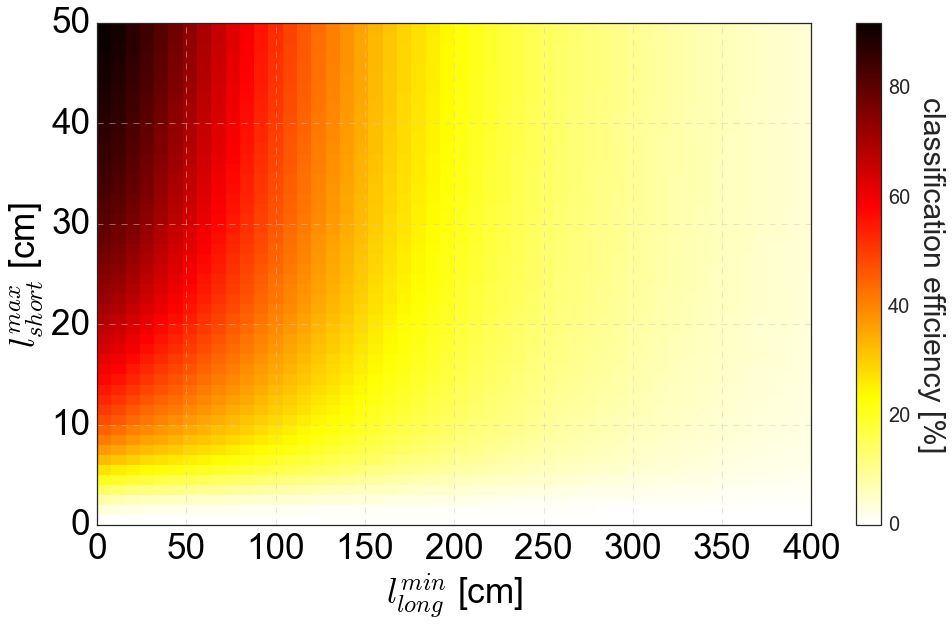

In [205]:
# efficiency as a function of track lenghts
l_long_min = np.linspace(0,400,50)
l_short_max = np.linspace(0,50,50)

eff_l = np.zeros((len(l_long_min),len(l_short_max)))
selected_truth_CC1p = truthCC1p

for i,l_l_min in zip(range(len(l_long_min)),l_long_min):
    for j,l_s_max in zip(range(len(l_short_max)),l_short_max):
        reduced_CC1p = selected_truth_CC1p[(selected_truth_CC1p.l_short<l_s_max)&(selected_truth_CC1p.l_long>l_l_min)]
        selection_efficiency = 100.*float(len(reduced_CC1p))/len(truthCC1p)
        eff_l[i][j] = selection_efficiency 
        
fig,ax = plt.subplots(figsize=(16,9))
extent = [l_long_min.min(),l_long_min.max(),l_short_max.min(),l_short_max.max()]
im = plt.imshow(eff_l.T,interpolation='none', cmap='hot_r',origin='lower', extent=extent)
cbar(im=im,title='classification efficiency [%]')
set_axes(ax,x_label = '$l_{long}^{min}$ [cm]', y_label='$l_{short}^{max}$ [cm]',fontsize=35)
ax.grid(linestyle='--',alpha=0.5)

In [182]:
# efficiency as a function of PIDA for the proton
PIDA_p_min = np.linspace(0,60,50)
PIDA_p_max = np.linspace(0,60,50)

eff_PIDA_p = np.zeros((len(PIDA_p_min),len(PIDA_p_max)))
selected_truth_CC1p = truthCC1p

for i,pida_min in zip(range(len(PIDA_p_min)),PIDA_p_min):
    for j,pida_max in zip(range(len(PIDA_p_max)),PIDA_p_max):
        reduced_CC1p = selected_truth_CC1p[(selected_truth_CC1p.PIDA_proton>pida_min)&(selected_truth_CC1p.PIDA_proton<pida_max)]
        selection_efficiency = 100.*float(len(reduced_CC1p))/len(truthCC1p)
        eff_PIDA_p[i][j] = selection_efficiency 
        
# fig,ax = plt.subplots(figsize=(16,9))
# extent = [PIDA_p_min.min(),PIDA_p_min.max(),PIDA_p_max.min(),PIDA_p_max.max()]
# im = plt.imshow(eff_PIDA_p.T,interpolation='none', cmap='hot_r',origin='lower', extent=extent)
# cbar = plt.colorbar(im)
# tick_locator = ticker.MaxNLocator(nbins=5)
# cbar.locator = tick_locator
# cbar.update_ticks()
# for t in cbar.ax.get_yticklabels(): t.set_fontsize(20)
# cbar.ax.get_yaxis().labelpad = 35
# cbar.ax.set_ylabel('classification efficiency [%]', rotation=270,fontsize=30)
# set_axes(ax,x_label = '$(PID_{A}^{p})^{min}$', y_label='$(PID_{A}^{p})^{max}$',fontsize=35)
# ax.grid(linestyle='--',alpha=0.5)

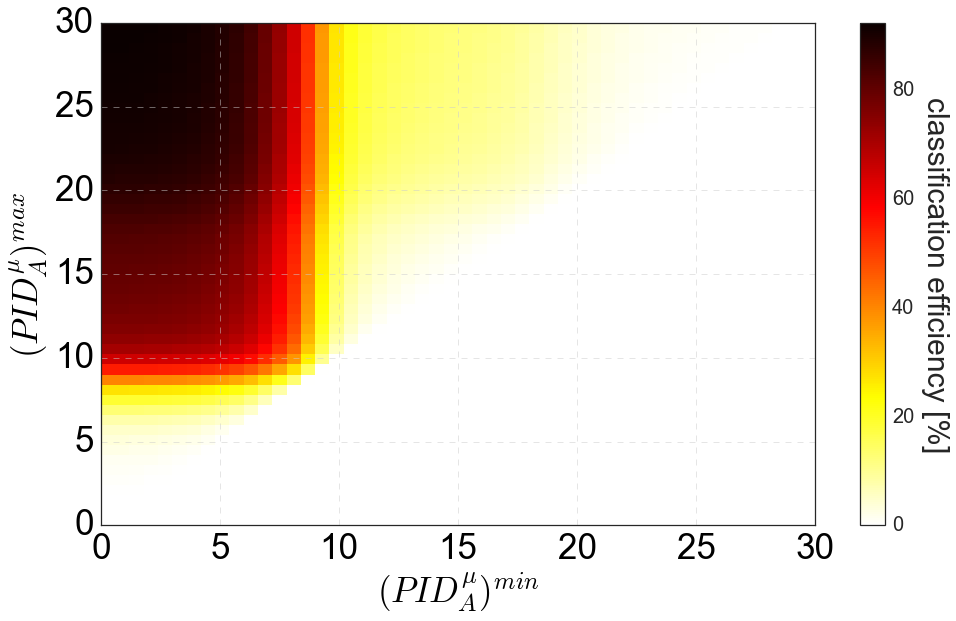

In [171]:
# efficiency as a function of PIDA for the muon
PIDA_mu_min = np.linspace(0,30,50)
PIDA_mu_max = np.linspace(0,30,50)

eff_PIDA_mu = np.zeros((len(PIDA_mu_min),len(PIDA_mu_max)))
selected_truth_CC1p = truthCC1p

for i,pida_min in zip(range(len(PIDA_mu_min)),PIDA_mu_min):
    for j,pida_max in zip(range(len(PIDA_mu_max)),PIDA_mu_max):
        reduced_CC1p = selected_truth_CC1p[(selected_truth_CC1p.PIDA_muon>pida_min)&(selected_truth_CC1p.PIDA_muon<pida_max)]
        selection_efficiency = 100.*float(len(reduced_CC1p))/len(truthCC1p)
        eff_PIDA_mu[i][j] = selection_efficiency 
        
fig,ax = plt.subplots(figsize=(16,9))
extent = [PIDA_mu_min.min(),PIDA_mu_min.max(),PIDA_mu_max.min(),PIDA_mu_max.max()]
im = plt.imshow(eff_PIDA_mu.T,interpolation='none', cmap='hot_r',origin='lower', extent=extent)
cbar = plt.colorbar(im)
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()
for t in cbar.ax.get_yticklabels(): t.set_fontsize(20)
cbar.ax.get_yaxis().labelpad = 35
cbar.ax.set_ylabel('classification efficiency [%]', rotation=270,fontsize=30)
set_axes(ax,x_label = '$(PID_{A}^{\\mu})^{min}$', y_label='$(PID_{A}^{\\mu})^{max}$',fontsize=35)
ax.grid(linestyle='--',alpha=0.5)

# CC1p topologies

In [42]:
true_positive = 100.*float(len(MCeventsTrueCC1p))/len(MCevents)
false_positive = 100.*float(len(MCeventsNonTrueCC1p))/len(MCevents)
false_negative = 100.*float(len(truthCC1p)-len(MCeventsTrueCC1p))/len(truthCC1p)

print '%.1f'%true_positive + '%' + ' of the sample are cc1p correctly classified'
print '%.1f'%false_positive + '%' + ' of the sample are misclassified as cc1p, and they are not!'
print 'missed %.1f'%false_negative + '%' + ' of real true cc1p, and did not find them '

22.1% of the sample are cc1p correctly classified
77.9% of the sample are misclassified as cc1p, and they are not!
missed 7.6% of real true cc1p, and did not find them 


# purity as a function of the selection cuts

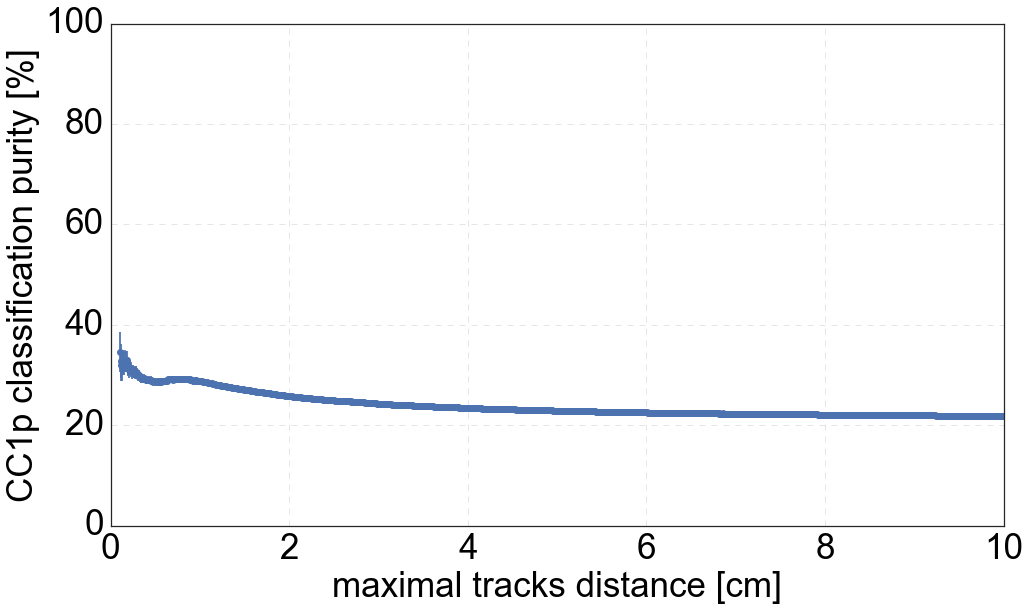

In [164]:
# purity as a function of maximal distance between the tracks
purity_distance , pur_err_distance = [] , []
d_max = np.linspace(0.1,10,1000)

for d in d_max:
    reduced_CC1p = MCevents[MCevents.distance<d]
    reduced_CC1p_true_CC1p = reduced_CC1p[reduced_CC1p.truth_cc1p==1]
    #     print "distance, correctly classified CC1p, total classified CC1p: ",d,len(reduced_CC1p_true_CC1p),len(reduced_CC1p)
    purity_distance.append(100.*float(len(reduced_CC1p_true_CC1p))/len(reduced_CC1p))
    pur_err_distance.append( purity_distance[-1]*np.sqrt( 1./len(reduced_CC1p_true_CC1p) + 1./len(reduced_CC1p) ) )

# fig,ax = plt.subplots(figsize=(16,9))
# plt.errorbar( d_max , y=purity_distance, yerr=pur_err_distance , fmt='o'  )
# set_axes(ax,x_label = 'maximal tracks distance [cm]', y_label='CC1p classification purity [%]',fontsize=35)
# ax.set_ylim(0,100)
# ax.grid(linestyle='--',alpha=0.5)

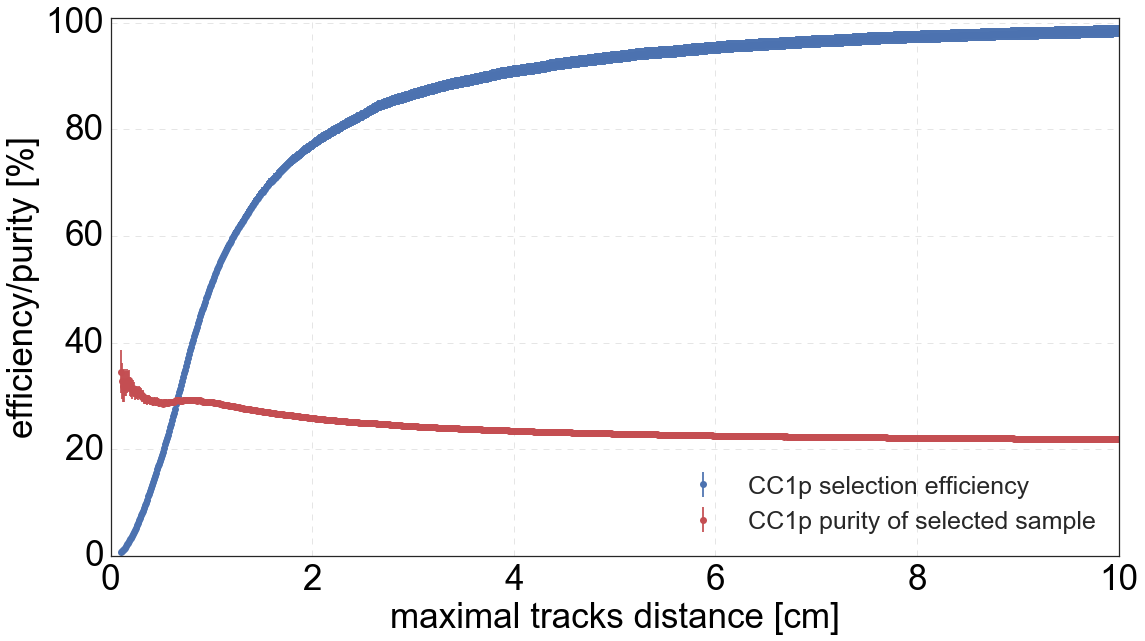

In [167]:
fig, ax = plt.subplots(figsize=(16,9))

plt.errorbar( d_max , y=efficiency_distance, yerr=eff_err_distance , fmt='o'  , label='CC1p selection efficiency')
plt.errorbar( d_max , y=purity_distance, yerr=pur_err_distance , fmt='ro' , label='CC1p purity of selected sample'  )
set_axes(ax,x_label = 'maximal tracks distance [cm]', y_label='efficiency/purity [%]',fontsize=35 )

ax.legend(loc='best',fontsize=25)
ax.set_ylim(0,101)
ax.grid(linestyle='--',alpha=0.5)
fig.tight_layout()


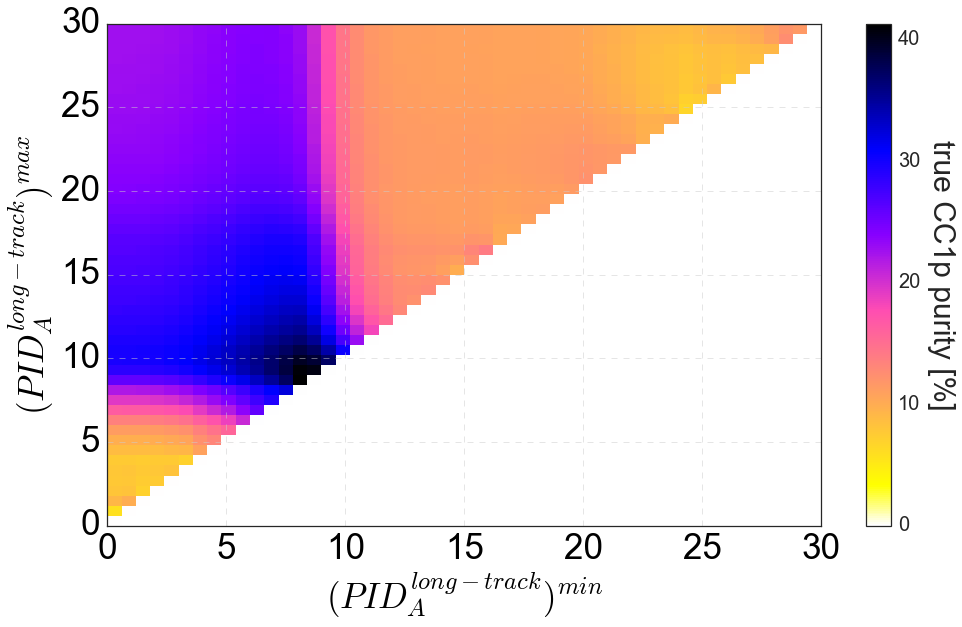

In [170]:
# efficiency as a function of PIDA for the muon
PIDA_mu_min = np.linspace(0,30,50)
PIDA_mu_max = np.linspace(0,30,50)

purity_PIDA_mu = np.zeros((len(PIDA_mu_min),len(PIDA_mu_max)))

for i,pida_min in zip(range(len(PIDA_mu_min)),PIDA_mu_min):
    for j,pida_max in zip(range(len(PIDA_mu_max)),PIDA_mu_max):
        reduced_CC1p = MCevents[(MCevents.PIDA_long>pida_min)&(MCevents.PIDA_long<pida_max)]
        reduced_CC1p_true_CC1p = reduced_CC1p[reduced_CC1p.truth_cc1p==1]
        denominator = len(reduced_CC1p) if len(reduced_CC1p)>0 else 1e20
        purity_PIDA_mu[i][j] = 100.*float(len(reduced_CC1p_true_CC1p))/denominator 
        
# fig,ax = plt.subplots(figsize=(16,9))
# extent = [PIDA_mu_min.min(),PIDA_mu_min.max(),PIDA_mu_max.min(),PIDA_mu_max.max()]
# im = plt.imshow(purity_PIDA_mu.T,interpolation='none', cmap='gnuplot2_r',origin='lower', extent=extent)
# cbar(im=im,title='true CC1p purity [%]')
# set_axes(ax,x_label = '$(PID_{A}^{long-track})^{min}$', y_label='$(PID_{A}^{long-track})^{max}$',fontsize=35)
# ax.grid(linestyle='--',alpha=0.5)

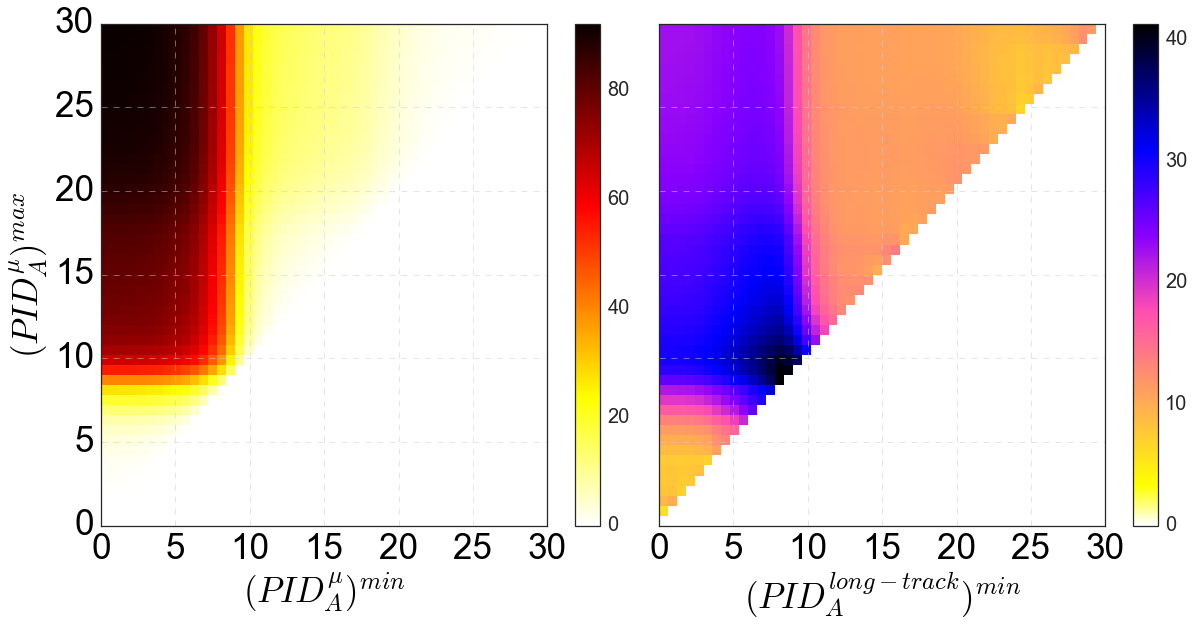

In [180]:
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(1,2,1)
extent = [PIDA_mu_min.min(),PIDA_mu_min.max(),PIDA_mu_max.min(),PIDA_mu_max.max()]
im = plt.imshow(eff_PIDA_mu.T,interpolation='none', cmap='hot_r',origin='lower', extent=extent)
cbar(im=im,title='')#='classification efficiency [%]')
set_axes(ax,x_label = '$(PID_{A}^{\\mu})^{min}$', y_label='$(PID_{A}^{\\mu})^{max}$',fontsize=35)
ax.grid(linestyle='--',alpha=0.5)

ax = fig.add_subplot(1,2,2)
extent = [PIDA_mu_min.min(),PIDA_mu_min.max(),PIDA_mu_max.min(),PIDA_mu_max.max()]
im = plt.imshow(purity_PIDA_mu.T,interpolation='none', cmap='gnuplot2_r',origin='lower', extent=extent)
cbar(im=im,title='')#true CC1p purity [%]')
set_axes(ax,x_label = '$(PID_{A}^{long-track})^{min}$', y_label='',fontsize=35)
ax.yaxis.set_major_formatter( NullFormatter() )
ax.grid(linestyle='--',alpha=0.5)
plt.subplots_adjust(wspace=0)

In [183]:
purity_PIDA_p = np.zeros((len(PIDA_p_min),len(PIDA_p_max)))

for i,pida_min in zip(range(len(PIDA_p_min)),PIDA_p_min):
    for j,pida_max in zip(range(len(PIDA_p_max)),PIDA_p_max):
        reduced_CC1p = MCevents[(MCevents.PIDA_short>pida_min)&(MCevents.PIDA_short<pida_max)]
        reduced_CC1p_true_CC1p = reduced_CC1p[reduced_CC1p.truth_cc1p==1]
        denominator = len(reduced_CC1p) if len(reduced_CC1p)>0 else 1e20
        purity_PIDA_p[i][j] = 100.*float(len(reduced_CC1p_true_CC1p))/denominator 

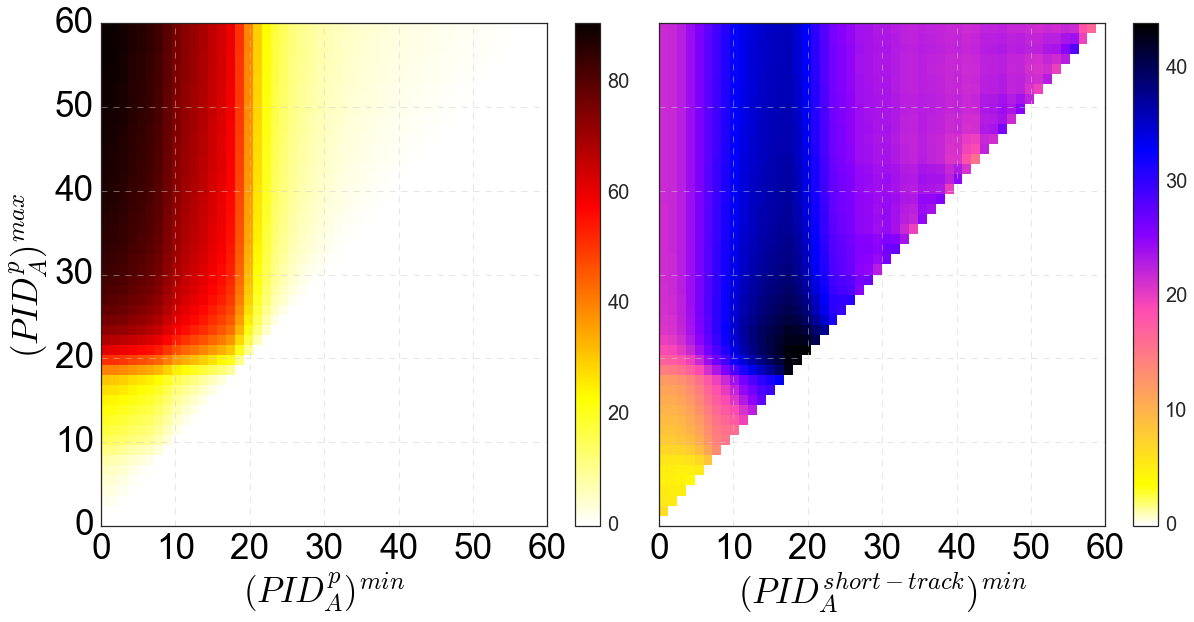

In [184]:
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(1,2,1)
extent = [PIDA_p_min.min(),PIDA_p_min.max(),PIDA_p_max.min(),PIDA_p_max.max()]
im = plt.imshow(eff_PIDA_p.T,interpolation='none', cmap='hot_r',origin='lower', extent=extent)
cbar(im=im,title='')
set_axes(ax,x_label = '$(PID_{A}^{p})^{min}$', y_label='$(PID_{A}^{p})^{max}$',fontsize=35)
ax.grid(linestyle='--',alpha=0.5)

ax = fig.add_subplot(1,2,2)
im = plt.imshow(purity_PIDA_p.T,interpolation='none', cmap='gnuplot2_r',origin='lower', extent=extent)
cbar(im=im,title='')
set_axes(ax,x_label = '$(PID_{A}^{short-track})^{min}$', y_label='',fontsize=35)
ax.yaxis.set_major_formatter( NullFormatter() )
ax.grid(linestyle='--',alpha=0.5)
plt.subplots_adjust(wspace=0)

In [194]:
purity_delta_phi = np.zeros((len(dphi_min),len(dphi_max)))

for i,delta_phi_min in zip(range(len(dphi_min)),dphi_min):
    for j,delta_phi_max in zip(range(len(dphi_max)),dphi_max):
        reduced_CC1p = MCevents[(MCevents.delta_phi>delta_phi_min)&(MCevents.delta_phi<delta_phi_max)]
        reduced_CC1p_true_CC1p = reduced_CC1p[reduced_CC1p.truth_cc1p==1]
        denominator = len(reduced_CC1p) if len(reduced_CC1p)>0 else 1e20
        purity_delta_phi[i][j] = 100.*float(len(reduced_CC1p_true_CC1p))/denominator 

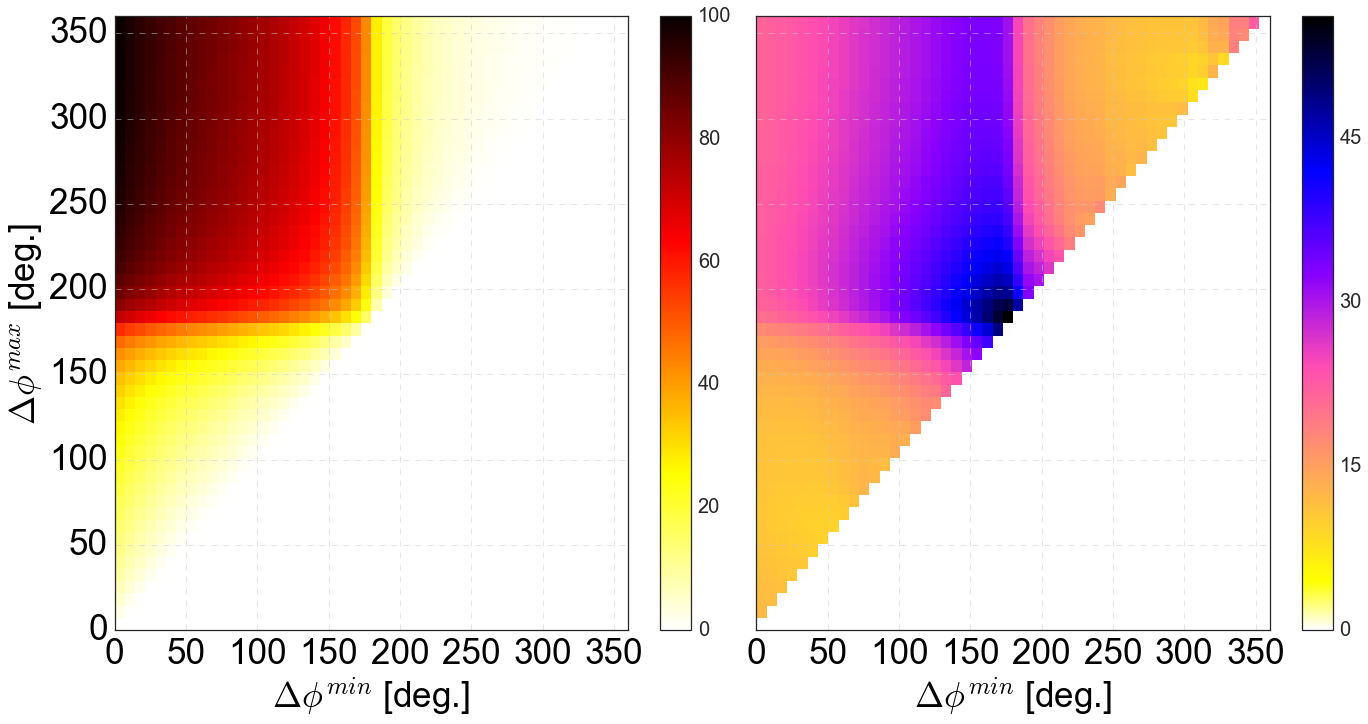

In [204]:
fig = plt.figure(figsize=(23,11))
ax = fig.add_subplot(1,2,1)
extent = [dphi_min.min(),dphi_min.max(),dphi_max.min(),dphi_max.max()]
im = plt.imshow(eff_delta_phi.T,interpolation='none', cmap='hot_r',origin='lower', extent=extent)
cbar(im=im,title='')
set_axes(ax,x_label = '$\\Delta \\phi ^{min}$ [deg.]', y_label='$\\Delta \\phi ^{max}$ [deg.]',fontsize=35)
ax.grid(linestyle='--',alpha=0.5)

ax = fig.add_subplot(1,2,2)
im = plt.imshow(purity_delta_phi.T,interpolation='none', cmap='gnuplot2_r',origin='lower', extent=extent)
cbar(im=im,title='')
set_axes(ax,x_label = '$\\Delta \\phi ^{min}$ [deg.]', y_label='',fontsize=35)

ax.yaxis.set_major_formatter( NullFormatter() )
ax.grid(linestyle='--',alpha=0.5)
plt.subplots_adjust(wspace=0)

In [206]:
purity_l = np.zeros((len(l_long_min),len(l_short_max)))


for i,ll_min in zip(range(len(l_long_min)),l_long_min):
    for j,ls_max in zip(range(len(l_short_max)),l_short_max):
        reduced_CC1p = MCevents[(MCevents.l_long>ll_min)&(MCevents.l_short<ls_max)]
        reduced_CC1p_true_CC1p = reduced_CC1p[reduced_CC1p.truth_cc1p==1]
        denominator = len(reduced_CC1p) if len(reduced_CC1p)>0 else 1e20
        purity_l[i][j] = 100.*float(len(reduced_CC1p_true_CC1p))/denominator 

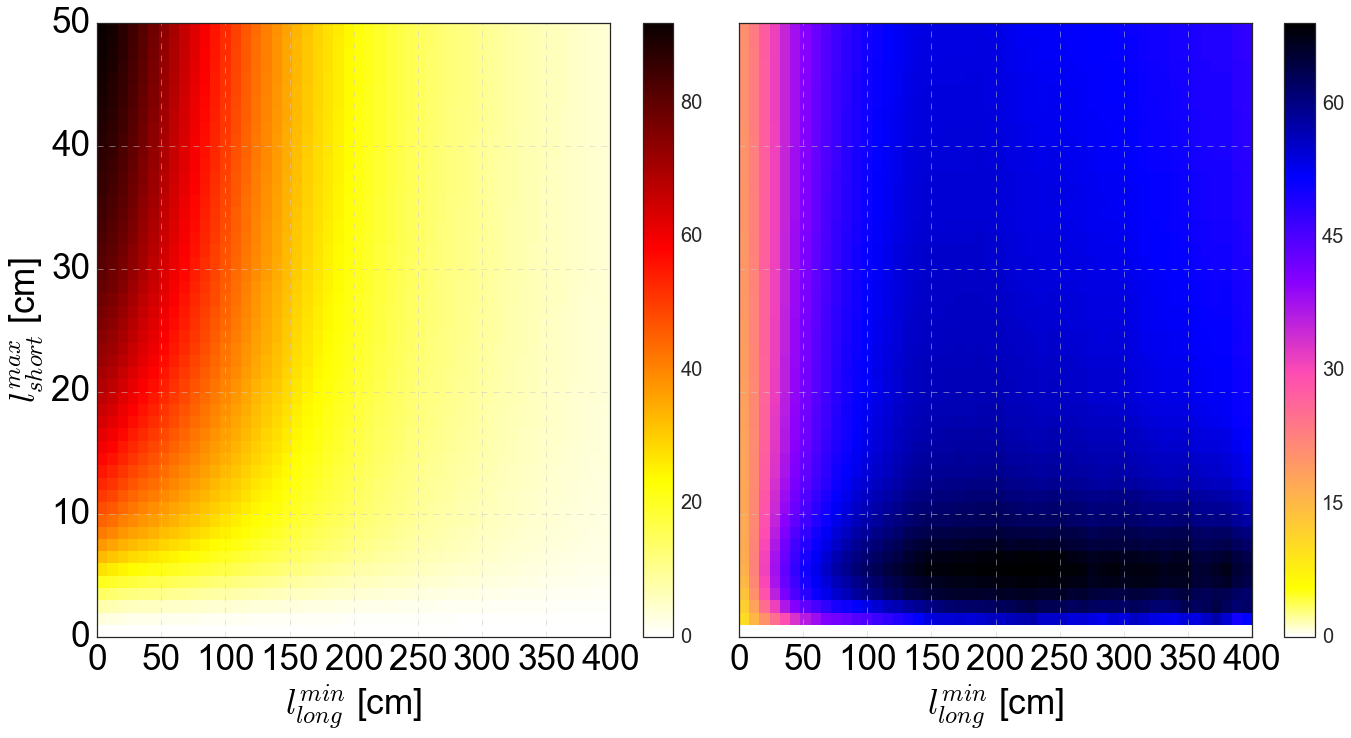

In [207]:
fig = plt.figure(figsize=(23,11))
ax = fig.add_subplot(1,2,1)
extent = [l_long_min.min(),l_long_min.max(),l_short_max.min(),l_short_max.max()]
im = plt.imshow(eff_l.T,interpolation='none', cmap='hot_r',origin='lower', extent=extent)
cbar(im=im,title='')
set_axes(ax,x_label = '$l_{long}^{min}$ [cm]', y_label='$l_{short}^{max}$ [cm]',fontsize=35)
ax.grid(linestyle='--',alpha=0.5)

ax = fig.add_subplot(1,2,2)
im = plt.imshow(purity_l.T,interpolation='none', cmap='gnuplot2_r',origin='lower', extent=extent)
cbar(im=im,title='')
set_axes(ax,x_label = '$l_{long}^{min}$ [cm]', y_label='',fontsize=35)

ax.yaxis.set_major_formatter( NullFormatter() )
ax.grid(linestyle='--',alpha=0.5)
plt.subplots_adjust(wspace=0)

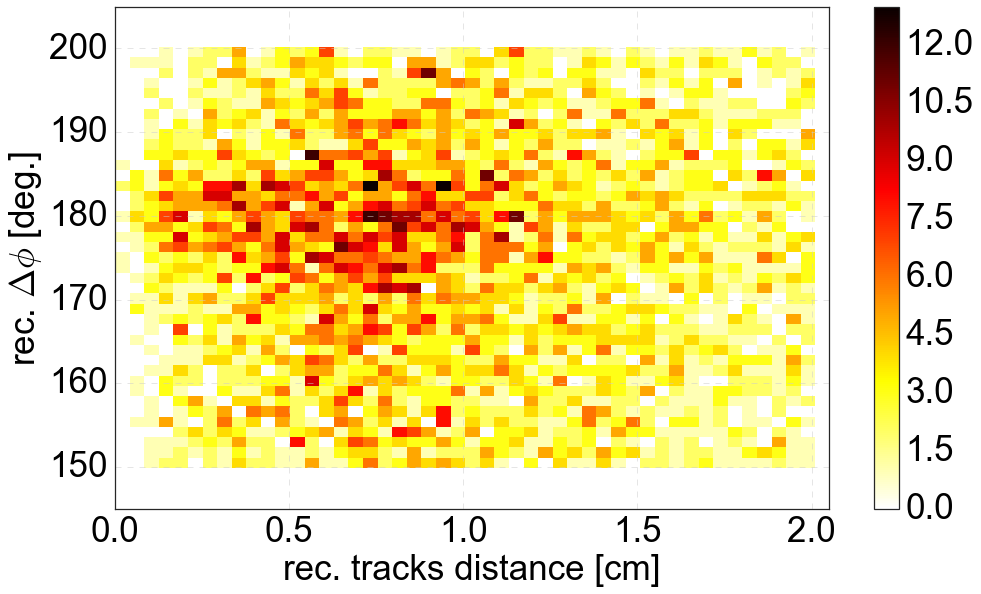

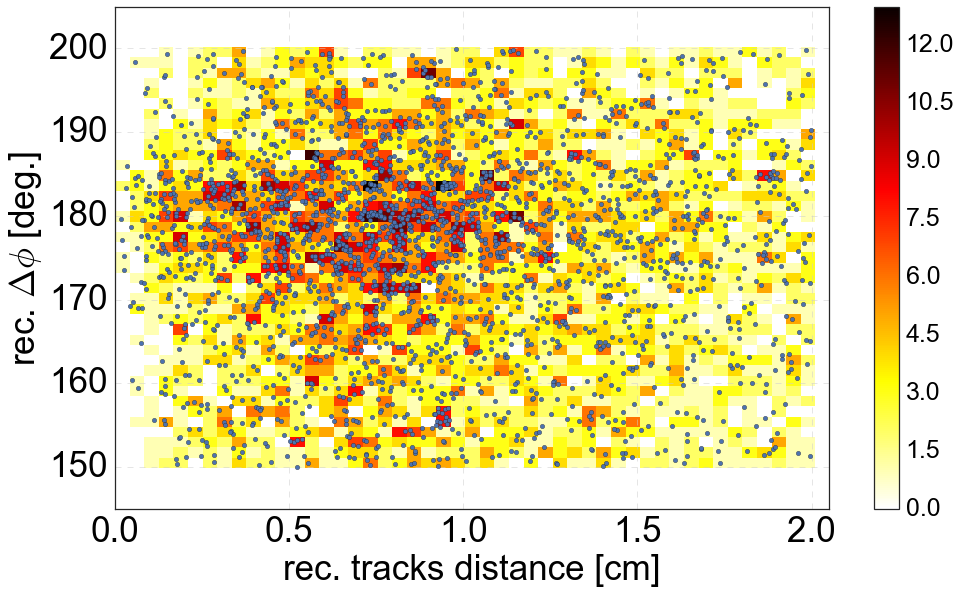

In [47]:

fig,ax = plt.subplots(figsize=(16,9))
plot_2d_histogram(data=MCevents , varx='distance' , vary='delta_phi' ,fontsize=35,
                  x_label = 'rec. tracks distance [cm]', y_label='rec. $\\Delta \\phi$ [deg.]',
                  binsx=np.linspace(0,2.05,50), binsy=np.linspace(145,205,50), ax=ax , 
                  do_add_title=False)
ax.grid(linestyle='--',alpha=0.5)

fig,ax = plt.subplots(figsize=(16,9))
plot_2d_histogram(data=MCevents , varx='distance' , vary='delta_phi' ,
                  binsx=np.linspace(0,2.05,50), binsy=np.linspace(145,205,50), ax=ax 
                 )
MCeventsTrueCC1p.plot.scatter('distance' ,'delta_phi',ax=ax)
set_axes(ax,x_label = 'rec. tracks distance [cm]', y_label='rec. $\\Delta \\phi$ [deg.]',fontsize=35)
ax.grid(linestyle='--',alpha=0.5)

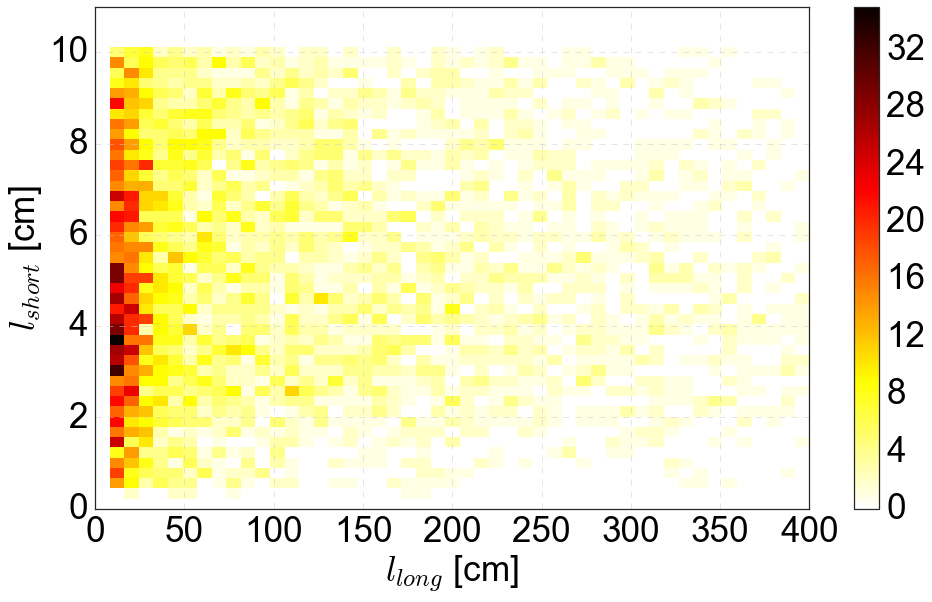

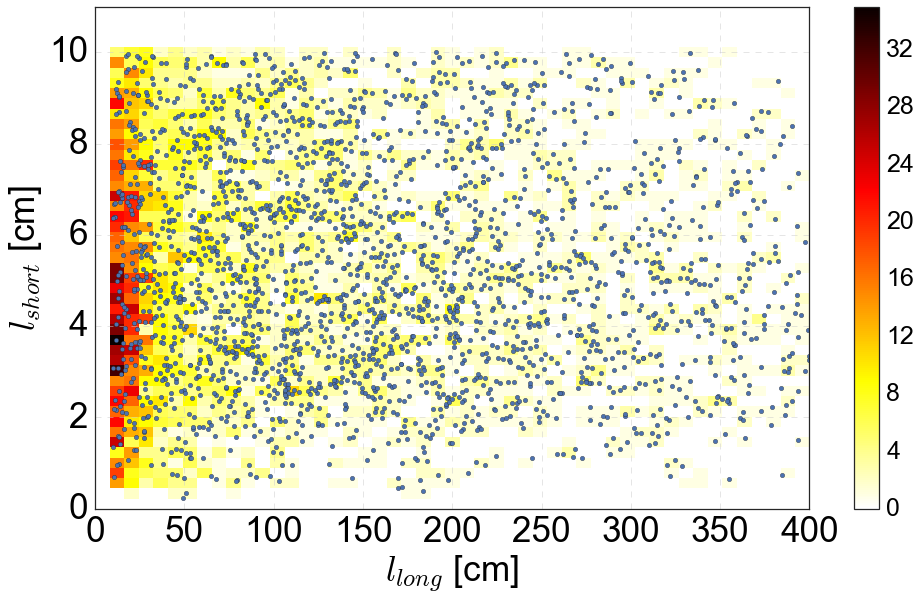

In [43]:
fig,ax = plt.subplots(figsize=(16,9))
plot_2d_histogram(data=MCevents , varx='l_long' , vary='l_short' ,fontsize=35,
                  x_label='$l_{long}$ [cm]' , y_label='$l_{short}$ [cm]',
                  binsx=np.linspace(0,400,50), binsy=np.linspace(0,11,50), ax=ax , do_save_fig=False,
                  do_add_title=False)
ax.grid(linestyle='--',alpha=0.5)

fig,ax = plt.subplots(figsize=(16,9))
plot_2d_histogram(data=MCevents , varx='l_long' , vary='l_short' ,
                  binsx=np.linspace(0,400,50), binsy=np.linspace(0,11,50), ax=ax , do_save_fig=False,
                  do_add_title=False)
MCeventsTrueCC1p.plot.scatter('l_long' ,'l_short',ax=ax)
set_axes(ax,x_label='$l_{long}$ [cm]' , y_label='$l_{short}$ [cm]',fontsize=35)
ax.grid(linestyle='--',alpha=0.5)

